In [2]:
# Importando pacotes necessários
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Carregar o arquivo 'dados.csv' no dataframe
df = pd.read_csv('dados.csv')

# Exibir as primeiras linhas do dataframe para verificar se foi carregado corretamente
print(df.head())

   Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
0            3.0                 0.0           1.0        0.0   
1            2.0                 0.0           1.0        1.0   
2            2.0                 0.0           1.0        0.0   
3            2.0                 1.0           1.0        1.0   
4            2.0                 1.0           1.0        1.0   

   Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  Televisao  \
0              0.0            0.0           0.0              0.0        1.0   
1              1.0            0.0           0.0              0.0        2.0   
2              0.0            0.0           0.0              0.0        1.0   
3              1.0            0.0           1.0              1.0        2.0   
4              1.0            0.0           1.0              0.0        2.0   

   Batedeira  ...  Secadora_Centrifuga  Aquecedor_de_Ambiente  \
0        1.0  ...                  0.0                    0.0   
1   

In [58]:
# Criar um dicionário de mapeamento
classe_map = {1: 'A', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2', 6: 'DE'}

# Substituir os valores da coluna 'CLASSE'
df['CLASSE'] = df['CLASSE'].map(classe_map)

# Verificar a alteração
print(df['CLASSE'].unique())

['C1' 'C2' 'DE' 'B2' 'B1' 'A']


In [5]:
#Carregar arquivo do drive
#df = pd.read_csv('/content/drive/MyDrive/Períodos/2024-2/Aprendizado de Máquina/Projeto/dados.csv')

Aplicando o PCA

In [59]:
# Separar as variáveis independentes (X) e a variável dependente (y)
dados_sem_classe = df.drop('CLASSE', axis=1)
classe_1 = df['CLASSE']

In [60]:
# Padronizar os dados antes de aplicar o PCA
scaler = StandardScaler()
dadosPCA_scaled = scaler.fit_transform(dados_sem_classe)

In [61]:
# Aplicar PCA
pca = PCA()
dadosPCA_reduced = pca.fit_transform(dadosPCA_scaled)

In [62]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

In [63]:
# Variância acumulada
cumulative_variance = np.cumsum(explained_variance)

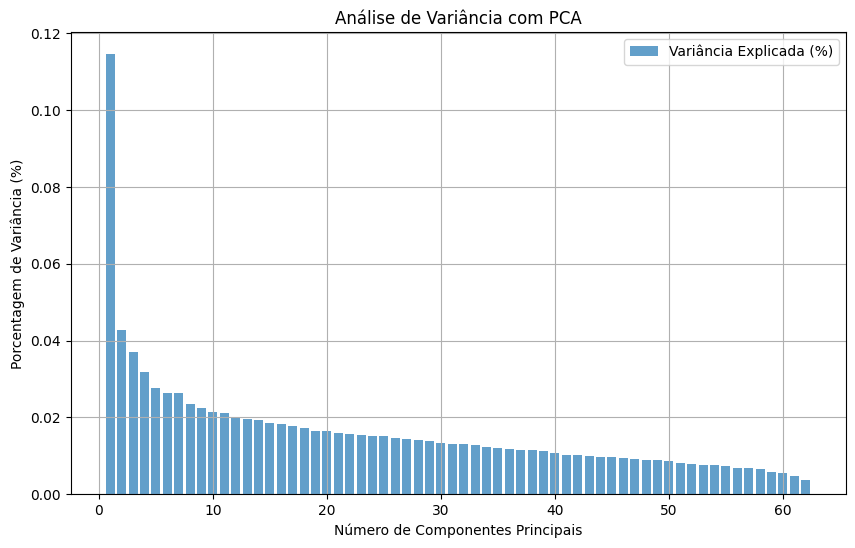

In [64]:
# Plotar a variância explicada e a acumulada em gráficos de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras para a variância explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variância Explicada (%)')
plt.title('Análise de Variância com PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Porcentagem de Variância (%)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [65]:
# Encontrar o número de componentes que explicam
n_components = np.argmax(cumulative_variance >= 0.8) + 1

print(f"Número de componentes principais: {n_components}")

Número de componentes principais: 38


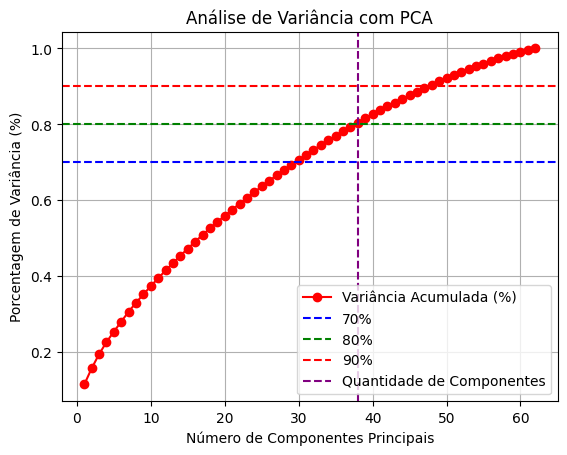

In [66]:
# Gráfico de linha para a variância acumulada
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Variância Acumulada (%)')
plt.title('Análise de Variância com PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Porcentagem de Variância (%)')

plt.axhline(y=0.70, color='blue', linestyle='--', linewidth=1.5, label='70%')
plt.axhline(y=0.80, color='green', linestyle='--', linewidth=1.5, label='80%')
plt.axhline(y=0.90, color='red', linestyle='--', linewidth=1.5, label='90%')


plt.axvline(x=n_components, color='purple', linestyle='--', linewidth=1.5, label='Quantidade de Componentes')


plt.legend(loc='best')
plt.grid(True)
plt.show()

In [67]:
# Aplicar PCA com o número de componentes selecionados
pca = PCA(n_components=n_components)
dadosPCA_reduced = pca.fit_transform(dadosPCA_scaled)

In [68]:
# Criar um DataFrame com as componentes principais
df_pca = pd.DataFrame(dadosPCA_reduced, columns=[f'PC{i+1}' for i in range(n_components)])


In [69]:
# Adicionar a coluna da variável alvo
df_pca['CLASSE'] = classe_1.reset_index(drop=True)


In [70]:
#Dataframe criado com as componentes principais

df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.204496 -1.006844  0.292810  2.228440  1.691404  0.738880  0.096084   
1 -2.261331 -1.212260  0.430861  0.744802 -0.132201 -0.652093 -0.296593   
2 -2.856910 -1.666279  0.220139  0.698245  0.296724  0.225372  0.184949   
3 -0.173618 -0.067160  1.074600 -0.507726 -0.373781 -0.465610 -1.109312   
4 -0.847043 -0.264572 -0.545872  0.109524 -0.256817 -0.556184 -1.214460   

        PC8       PC9      PC10  ...      PC30      PC31      PC32      PC33  \
0  0.678316 -0.263904  0.549220  ...  1.149779 -0.526078 -0.671314 -0.850601   
1 -0.218784 -0.033690  0.799189  ...  0.218705  1.382777 -0.065876  0.539862   
2  0.296761 -0.325594  0.567634  ...  0.197474 -0.360432  0.460576 -0.084544   
3 -0.116500  0.171593 -0.177865  ...  0.578219 -0.042933 -0.355251  0.525708   
4 -0.546573  0.221001 -0.185716  ...  0.279340 -0.098982 -0.223210 -0.365910   

       PC34      PC35      PC36      PC37      PC38  CLASSE  
0  0.287521 -0.236243 -0.104761  1.127899 -0.391934      C1  
1 -1.063238 -0.345426  1.086673 -0.048517 -0.480559      C2  
2  0.283896  1.311112 -0.768449  0.242491  1.289931      DE  
3  0.333839 -0.291411  0.534303  0.302293 -0.220385      B2  
4  0.221137  0.174461  0.064701 -0.203293  0.688208      C1  

[5 rows x 39 columns]

O PCA selecionou 38 componentes para explicar 80% dos dados. Será criado outro dataframe que seleciona as variáveis mais correlatadas com a primeira componente principal.

In [71]:
#Correlacao Selecionada, acima de:

corre = 0.4

In [72]:
# Ajustar o PCA aos dados e calcular as componentes principais
pca_components = dadosPCA_reduced.copy()

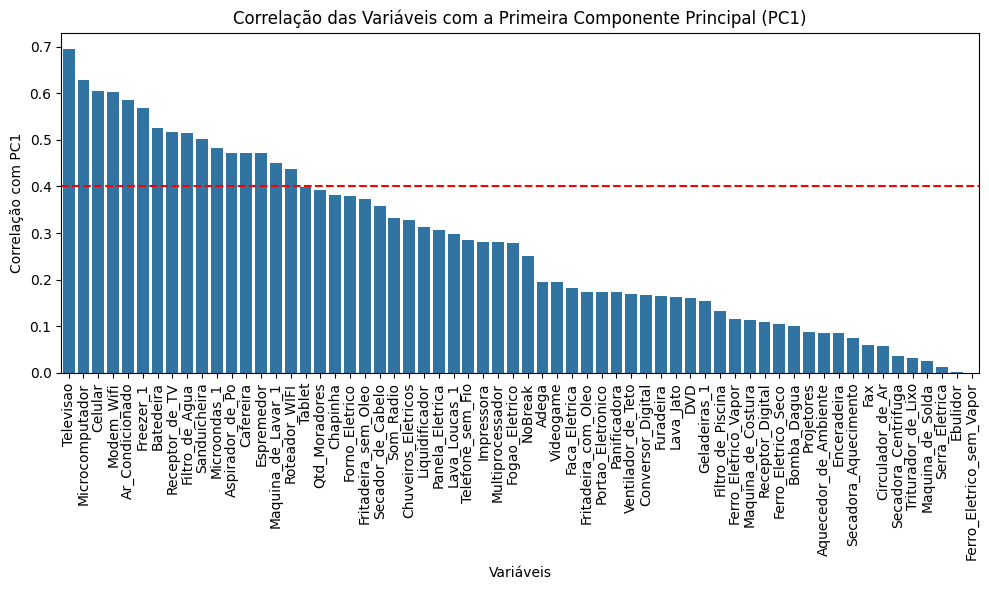

In [73]:
# Calcular a correlação entre as variáveis originais e a primeira componente principal pela correlação de spearman
corr_with_PC1 = dados_sem_classe.apply(lambda x: x.corr(pd.Series(pca_components[:, 0]), method='spearman'))

# Ordenar as variáveis por correlação absoluta com a primeira componente principal
corr_with_PC1_sorted = corr_with_PC1.abs().sort_values(ascending=False)

# Criar um gráfico de barras para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_PC1_sorted.index, y=corr_with_PC1_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Correlação com PC1')
plt.title('Correlação das Variáveis com a Primeira Componente Principal (PC1)')
plt.axhline(y=corre, color='red', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

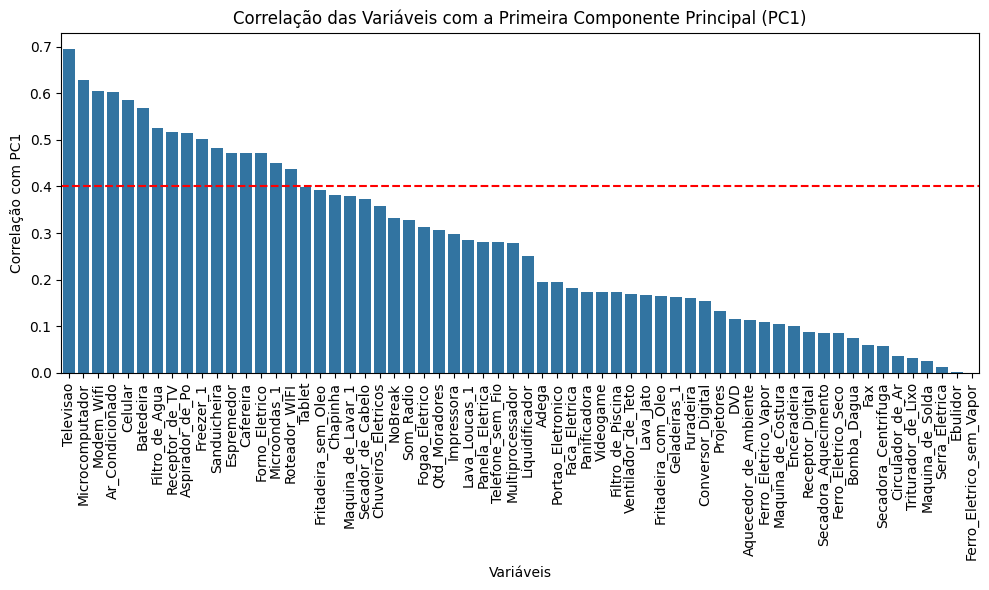

In [74]:
# Calcular a correlação entre as variáveis originais e a primeira componente principal pela correlação de Pearson
corr2_with_PC1 = dados_sem_classe.apply(lambda x: x.corr(pd.Series(pca_components[:, 0]), method='pearson'))

# Ordenar as variáveis por correlação absoluta com a primeira componente principal
corr2_with_PC1_sorted = corr2_with_PC1.abs().sort_values(ascending=False)

# Criar um gráfico de barras para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=corr2_with_PC1_sorted.index, y=corr_with_PC1_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Correlação com PC1')
plt.title('Correlação das Variáveis com a Primeira Componente Principal (PC1)')
plt.axhline(y=corre, color='red', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.show()

In [75]:
# Filtrar variáveis com maior correlação
selected_vars = corr_with_PC1_sorted[corr_with_PC1_sorted > corre].index

In [76]:
# Criar um novo dataframe com as variáveis selecionadas
df_selected = dados_sem_classe[selected_vars].copy()

# Adicionar a coluna CLASSE ao novo dataframe
df_selected['CLASSE'] = classe_1.reset_index(drop=True)

In [77]:
#Novo dataframe com as variaveis mais correlatadas com a primeira componente principal

df_selected.head()
#print(df_selected.shape)

Televisao  Microcomputador  Celular  Modem_Wifi  Ar_Condicionado  \
0        1.0              0.0      1.0         0.0              0.0   
1        2.0              1.0      2.0         0.0              0.0   
2        1.0              0.0      1.0         0.0              0.0   
3        2.0              1.0      2.0         0.0              1.0   
4        2.0              1.0      2.0         0.0              0.0   

   Freezer_1  Batedeira  Receptor_de_TV  Filtro_de_Agua  Sanduicheira  \
0        0.0        1.0             0.0             0.0           0.0   
1        1.0        0.0             0.0             0.0           0.0   
2        0.0        0.0             1.0             0.0           0.0   
3        1.0        0.0             0.0             1.0           0.0   
4        1.0        0.0             0.0             0.0           0.0   

   Microondas_1  Aspirador_de_Po  Cafereira  Espremedor  Maquina_de_Lavar_1  \
0           0.0              0.0        1.0         0.0                 0.0   
1           0.0              0.0        0.0         0.0                 0.0   
2           0.0              0.0        0.0         0.0                 0.0   
3           1.0              0.0        1.0         1.0                 1.0   
4           1.0              1.0        0.0         0.0                 1.0   

   Roteador_WIFI CLASSE  
0            0.0     C1  
1            0.0     C2  
2            0.0     DE  
3            0.0     B2  
4            0.0     C1

Aplicando redução pelo coeficiente de spearman

In [78]:
# Calcular a correlação de Spearman para as variáveis
spearman_corr = dados_sem_classe.corr(method='spearman')

In [79]:
# Definir um limiar (threshold) para selecionar as variáveis com alta correlação
threshold = 0.3

In [80]:
# Selecionar as variáveis mais correlacionadas
correlated_vars = np.where(np.abs(spearman_corr) > threshold)
correlated_vars = [(spearman_corr.index[x], spearman_corr.columns[y]) for x, y in zip(*correlated_vars) if x != y]

In [81]:
# Exibir a matriz de correlação
spearman_corr

Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  \
Qtd_Moradores             1.000000            0.189698      0.159700   
Maquina_de_Lavar_1        0.189698            1.000000      0.104173   
Geladeiras_1              0.159700            0.104173      1.000000   
Freezer_1                 0.220184            0.340657      0.146783   
Microcomputador           0.189814            0.289392      0.135734   
...                            ...                 ...           ...   
Videogame                 0.161385            0.063096      0.016991   
Som_Radio                 0.068233            0.186411     -0.017728   
Filtro_de_Agua            0.011826            0.139100     -0.036903   
Adega                     0.007329            0.032717     -0.029571   
Chuveiros_Eletricos       0.192097            0.171308      0.171176   

                     Freezer_1  Microcomputador  Lava_Loucas_1  Microondas_1  \
Qtd_Moradores         0.220184         0.189814       0.039492      0.176818   
Maquina_de_Lavar_1    0.340657         0.289392       0.088260      0.376825   
Geladeiras_1          0.146783         0.135734       0.031018      0.116688   
Freezer_1             1.000000         0.400175       0.209380      0.378735   
Microcomputador       0.400175         1.000000       0.269351      0.384409   
...                        ...              ...            ...           ...   
Videogame             0.054537         0.097146       0.026078      0.033425   
Som_Radio             0.131972         0.238300       0.176579      0.223965   
Filtro_de_Agua        0.265226         0.246136       0.200304      0.082925   
Adega                 0.113163         0.126250       0.211893      0.052815   
Chuveiros_Eletricos   0.228327         0.249473       0.051716      0.260961   

                     Ar_Condicionado  Televisao  Batedeira  ...  \
Qtd_Moradores               0.127549   0.323250   0.199997  ...   
Maquina_de_Lavar_1          0.287609   0.293095   0.164071  ...   
Geladeiras_1                0.121494   0.158315   0.042224  ...   
Freezer_1                   0.348615   0.392710   0.191230  ...   
Microcomputador             0.409379   0.456046   0.271541  ...   
...                              ...        ...        ...  ...   
Videogame                   0.049909   0.159713   0.126905  ...   
Som_Radio                   0.199735   0.249342   0.149335  ...   
Filtro_de_Agua              0.217112   0.321336   0.319349  ...   
Adega                       0.071545   0.141720   0.132342  ...   
Chuveiros_Eletricos         0.186185   0.244612   0.144261  ...   

                     Secadora_Aquecimento  Secadora_Centrifuga  \
Qtd_Moradores                    0.057502             0.076312   
Maquina_de_Lavar_1               0.016951             0.041188   
Geladeiras_1                     0.060488             0.015376   
Freezer_1                        0.012515             0.035852   
Microcomputador                  0.020031             0.094913   
...                                   ...                  ...   
Videogame                        0.047927             0.009566   
Som_Radio                       -0.008806            -0.020462   
Filtro_de_Agua                  -0.036900            -0.028875   
Adega                            0.104793            -0.014937   
Chuveiros_Eletricos             -0.022672            -0.031136   

                     Aquecedor_de_Ambiente  Ventilador_de_Teto  \
Qtd_Moradores                    -0.031029            0.166776   
Maquina_de_Lavar_1                0.039554            0.088772   
Geladeiras_1                     -0.022821            0.059523   
Freezer_1                         0.017989            0.241406   
Microcomputador                   0.043198            0.084692   
...                                    ...                 ...   
Videogame                        -0.026629            0.037953   
Som_Radio                         0.059946            0.009060   
Fil

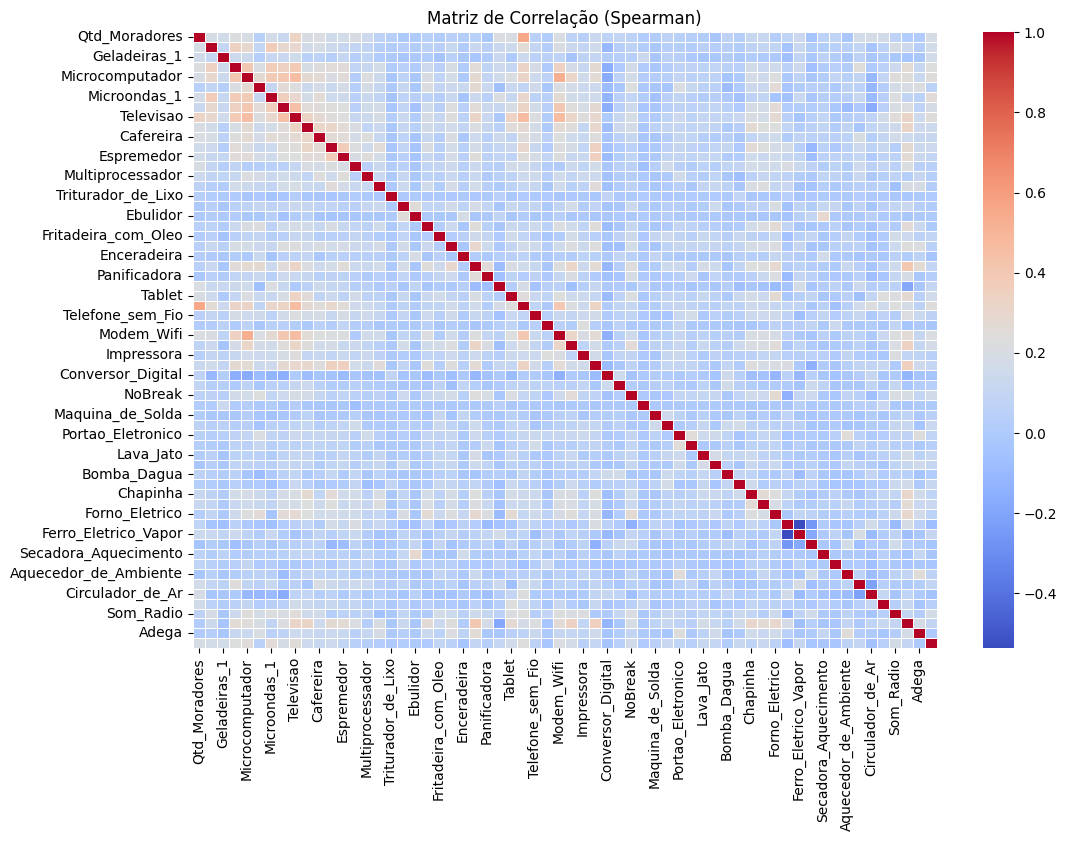

In [82]:
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (Spearman)')
plt.show()

In [83]:
# Remover duplicatas e manter uma cópia da variável apenas
selected_columns = list(set([var[0] for var in correlated_vars]))

In [84]:
# Criar um novo dataframe com essas variáveis correlacionadas
df_spearman = dados_sem_classe[selected_columns].copy()


In [85]:
# Adicionar a coluna da variável alvo
df_spearman['CLASSE'] = classe_1.reset_index(drop=True)


In [86]:
# Exibir as primeiras linhas do novo DataFrame
df_spearman.head()

Microondas_1  Ferro_Eletrico_Vapor  Televisao  Modem_Wifi  Qtd_Moradores  \
0           0.0                   0.0        1.0         0.0            3.0   
1           0.0                   0.0        2.0         0.0            2.0   
2           0.0                   0.0        1.0         0.0            2.0   
3           1.0                   0.0        2.0         0.0            2.0   
4           1.0                   0.0        2.0         0.0            2.0   

   Ar_Condicionado  Microcomputador  Receptor_de_TV  Roteador_WIFI  \
0              0.0              0.0             0.0            0.0   
1              0.0              1.0             0.0            0.0   
2              0.0              0.0             1.0            0.0   
3              1.0              1.0             0.0            0.0   
4              0.0              1.0             0.0            0.0   

   Ferro_Eletrico_Seco  ...  Celular  Filtro_de_Agua  Tablet  Cafereira  \
0                  0.0  ...      1.0             0.0     0.0        1.0   
1                  1.0  ...      2.0             0.0     0.0        0.0   
2                  0.0  ...      1.0             0.0     0.0        0.0   
3                  1.0  ...      2.0             1.0     0.0        1.0   
4                  1.0  ...      2.0             0.0     0.0        0.0   

   Espremedor  Batedeira  Sanduicheira  Aspirador_de_Po  Freezer_1  CLASSE  
0         0.0        1.0           0.0              0.0        0.0      C1  
1         0.0        0.0           0.0              0.0        1.0      C2  
2         0.0        0.0           0.0              0.0        0.0      DE  
3         1.0        0.0           0.0              0.0        1.0      B2  
4         0.0        0.0           0.0              1.0        1.0      C1  

[5 rows x 21 columns]

O algoritmo não encontrou variáveis correlatadas com mais de 70%, por isso será criado um dataframe com as variáveis que possuem maior correlação com as variáveis de saída.

In [87]:
#Correlação a ser selecionada

cor = 0.3

In [88]:
# Calcular a correlação de Spearman entre as variáveis de entrada e a variável de saída
spearman_corr_with_target = dados_sem_classe.apply(lambda x: x.corr(classe_1, method='spearman'))

# Ordenar as variáveis por ordem de correlação (absoluta) com a variável de saída
spearman_corr_with_target = spearman_corr_with_target.abs().sort_values(ascending=False)

# Exibir a correlação de cada variável de entrada com a variável de saída
print(spearman_corr_with_target)


ValueError: could not convert string to float: 'C1'

In [89]:
# Filtrar as variáveis que têm maior correlação
selected_features = spearman_corr_with_target[spearman_corr_with_target > cor].index

# Criar um novo DataFrame apenas com essas variáveis
df_high_corr = dados_sem_classe[selected_features].copy()

# Adicionar a coluna da variável alvo
df_high_corr['CLASSE'] = classe_1.reset_index(drop=True)

In [90]:
# Exibir as primeiras linhas do novo DataFrame feito a partir das variáveis de entrada mais correlatadas com as variáveis de saída
df_high_corr.head()

Microcomputador  Microondas_1  Freezer_1  Televisao  Ar_Condicionado  \
0              0.0           0.0        0.0        1.0              0.0   
1              1.0           0.0        1.0        2.0              0.0   
2              0.0           0.0        0.0        1.0              0.0   
3              1.0           1.0        1.0        2.0              1.0   
4              1.0           1.0        1.0        2.0              0.0   

   Modem_Wifi  Maquina_de_Lavar_1  Celular  Cafereira  Lava_Loucas_1  \
0         0.0                 0.0      1.0        1.0            0.0   
1         0.0                 0.0      2.0        0.0            0.0   
2         0.0                 0.0      1.0        0.0            0.0   
3         0.0                 1.0      2.0        1.0            0.0   
4         0.0                 1.0      2.0        0.0            0.0   

   Chuveiros_Eletricos  Som_Radio  Batedeira CLASSE  
0                  1.0        1.0        1.0     C1  
1                  1.0        0.0        0.0     C2  
2                  1.0        1.0        0.0     DE  
3                  1.0        0.0        0.0     B2  
4                  1.0        1.0        0.0     C1

DataFrames criados até aqui:

df_pca - Componentes principais
df_selected - Variaveis com maior correlacao com a Primeira Componente Principal
df_spearman - Remoção das variáveis mais correlatadas
df_high_corr - Variaveis de entrada com maior correlação com as variáveis de saída

Aplicando a seleção de Dados por k-fold

In [91]:
#Selecionando o dataframe

df_kfold = df_pca.copy()
#df_kfold = df_selected.copy()
#df_kfold = df_spearman.copy()
#df_kfold = df_high_corr.copy()

In [92]:
# Separando as variáveis objetivo
X = df_kfold.drop('CLASSE', axis=1)
y = df_kfold['CLASSE']


In [93]:
#Definindo o número de folds

num_folds = 7
sub_num_folds = 7

In [94]:
#Configurar o k-Fold Principal

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [95]:
#Dividir os Dados para o k-fold teste

fold_indices = list(kf.split(X, y))

In [96]:
#Sub-K-Fold para Treino e Validação

sub_kf = KFold(n_splits=sub_num_folds, shuffle=True, random_state=42)


In [44]:
# Iterar sobre cada fold principal
for fold, (train_index, test_index) in enumerate(fold_indices):
    # Dados de treino e teste para o fold principal
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Aplicar o sub-k-fold para treino e validação
    sub_kf = KFold(n_splits=sub_num_folds, shuffle=True, random_state=42)

    # Armazenar os índices dos folds secundários
    sub_fold_indices = list(sub_kf.split(X_train, y_train))

    for sub_fold, (sub_train_index, sub_val_index) in enumerate(sub_fold_indices):
        # Dados de treino e validação para o sub-k-fold
        X_sub_train, X_sub_val = X_train.iloc[sub_train_index], X_train.iloc[sub_val_index]
        y_sub_train, y_sub_val = y_train.iloc[sub_train_index], y_train.iloc[sub_val_index]

        # Aqui você pode treinar e validar seu modelo
        # Exemplo: print(f'Fold {fold + 1}, Sub-Fold {sub_fold + 1}')


Aplicando as redes neurais no k-fold

In [97]:
# Função para criar o modelo de rede neural
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(12, activation='relu', input_shape=(input_shape,)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [98]:
# Lista para armazenar as métricas de avaliação
validation_reports = []

In [99]:

# Codificar as classes (variável alvo)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_sub_train_encoded = le.transform(y_sub_train)
y_test_encoded = le.transform(y_test)

# Aplicar k-Fold e Sub-K-Fold
for fold, (train_index, test_index) in enumerate(fold_indices):
    # Dados de treino e teste para o fold principal
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Codificar as classes de treino e teste
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    
    # Aplicar Sub-K-Fold para treino e validação
    sub_fold_indices = list(sub_kf.split(X_train, y_train_encoded))
    
    for sub_fold, (sub_train_index, sub_val_index) in enumerate(sub_fold_indices):
        # Dados de treino e validação para o sub-k-fold
        X_sub_train, X_sub_val = X_train.iloc[sub_train_index], X_train.iloc[sub_val_index]
        y_sub_train, y_sub_val = y_train_encoded[sub_train_index], y_train_encoded[sub_val_index]
        
        # Criar o modelo
        num_classes = len(le.classes_)
        model = create_model(X.shape[1], num_classes)
        
        # Treinar o modelo
        model.fit(X_sub_train, y_sub_train, epochs=100, batch_size=32, verbose=0)
        
        # Avaliar o modelo
        y_val_pred = model.predict(X_sub_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        
        # Armazenar o relatório de validação
        report = classification_report(y_sub_val, y_val_pred_classes, output_dict=True)
        validation_reports.append(report)
        
        # Avaliar no conjunto de teste do fold principal
        y_test_pred = model.predict(X_test)
        y_test_pred_classes = np.argmax(y_test_pred, axis=1)
        
        # Imprimir o relatório de teste
        print(f'Fold {fold + 1}, Sub-Fold {sub_fold + 1} - Teste')
        print(classification_report(y_test_encoded, y_test_pred_classes))


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
Fold 1, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.33      0.21      0.26        14
           2       0.49      0.55      0.51        33
           3       0.54      0.52      0.53        48
           4       0.69      0.61      0.65        33
           5       0.71      0.87      0.78        23

    accuracy                           0.56       157
   macro avg       0.50      0.51      0.50       157
weighted avg       0.56      0.56      0.56       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 1, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.57      0.53        14
           2       0.58      0.55      0.56        33
           3       0.59      0.54      0.57        48
           4       0.56      0.70      0.62        33
           5       0.86      0.78      0.82        23

    accuracy                           0.59       157
   macro avg       0.51      0.52      0.52       157
weighted avg       0.59      0.59      0.59       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 1, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.22      0.14      0.17        14
           2       0.50      0.67      0.57        33
           3       0.57      0.44      0.49        48
           4       0.56      0.61      0.58        33
           5       0.83      0.87      0.85        23

    accuracy                           0.55       157
   macro avg       0.47      0.48      0.47       157
weighted avg       0.54      0.55      0.54       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 1, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.50      0.14      0.22        14
           2       0.48      0.64      0.55        33
           3       0.57      0.48      0.52        48
           4       0.55      0.70      0.61        33
           5       0.95      0.83      0.88        23

    accuracy                           0.57       157
   macro avg       0.56      0.52      0.52       157
weighted avg       0.59      0.57      0.56       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Fold 1, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      0.36      0.45        14
           2       0.44      0.70      0.54        33
           3       0.48      0.33      0.40        48
           4       0.52      0.52      0.52        33
           5       0.69      0.87      0.77        23

    accuracy                           0.52       157
   macro avg       0.46      0.46      0.45       157
weighted avg       0.51      0.52      0.50       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Fold 1, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.40      0.14      0.21        14
           2       0.50      0.55      0.52        33
           3       0.49      0.48      0.48        48
           4       0.54      0.58      0.56        33
           5       0.75      0.78      0.77        23

    accuracy                           0.52       157
   macro avg       0.48      0.48      0.47       157
weighted avg       0.52      0.52      0.52       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.17      0.07      0.10        14
           2       0.45      0.61      0.52        33
           3       0.58      0.52      0.55        48
           4       0.60      0.64      0.62        33
           5       0.86      0.83      0.84        23

    accuracy                           0.56       157
   macro avg       0.49      0.50      0.49       157
weighted avg       0.55      0.56      0.55       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 2, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.33      0.22      0.27         9
           2       0.34      0.36      0.35        33
           3       0.35      0.32      0.33        41
           4       0.63      0.67      0.65        46
           5       0.73      0.70      0.72        27

    accuracy                           0.50       157
   macro avg       0.44      0.55      0.45       157
weighted avg       0.50      0.50      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         9
           2       0.35      0.39      0.37        33
           3       0.34      0.34      0.34        41
           4       0.66      0.59      0.62        46
           5       0.69      0.74      0.71        27

    accuracy                           0.47       157
   macro avg       0.34      0.34      0.34       157
weighted avg       0.47      0.47      0.47       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.67      0.22      0.33         9
           2       0.42      0.45      0.43        33
           3       0.36      0.39      0.37        41
           4       0.61      0.48      0.54        46
           5       0.66      0.78      0.71        27

    accuracy                           0.49       157
   macro avg       0.48      0.55      0.45       157
weighted avg       0.51      0.49      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.38      0.33      0.35         9
           2       0.37      0.39      0.38        33
           3       0.32      0.37      0.34        41
           4       0.65      0.48      0.55        46
           5       0.77      0.85      0.81        27

    accuracy                           0.49       157
   macro avg       0.47      0.57      0.49       157
weighted avg       0.51      0.49      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
Fold 2, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.11      0.11      0.11         9
           2       0.32      0.36      0.34        33
           3       0.38      0.39      0.39        41
           4       0.63      0.48      0.54        46
           5       0.70      0.78      0.74        27

    accuracy                           0.46       157
   macro avg       0.41      0.52      0.44       157
weighted avg       0.48      0.46      0.47       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 2, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.22      0.25         9
           2       0.38      0.48      0.43        33
           3       0.33      0.32      0.32        41
           4       0.58      0.46      0.51        46
           5       0.77      0.85      0.81        27

    accuracy                           0.48       157
   macro avg       0.39      0.39      0.39       157
weighted avg       0.48      0.48      0.48       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.29      0.22      0.25         9
           2       0.43      0.48      0.46        33
           3       0.42      0.39      0.41        41
           4       0.61      0.54      0.57        46
           5       0.70      0.78      0.74        27

    accuracy                           0.52       157
   macro avg       0.45      0.57      0.47       157
weighted avg       0.52      0.52      0.51       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.36      0.44      0.40         9
           2       0.44      0.59      0.51        37
           3       0.47      0.36      0.41        50
           4       0.58      0.58      0.58        31
           5       0.75      0.62      0.68        24

    accuracy                           0.49       157
   macro avg       0.43      0.43      0.43       157
weighted avg       0.50      0.49      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 3, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.40      0.22      0.29         9
           2       0.41      0.54      0.47        37
           3       0.45      0.42      0.43        50
           4       0.50      0.45      0.47        31
           5       0.78      0.75      0.77        24

    accuracy                           0.49       157
   macro avg       0.49      0.45      0.46       157
weighted avg       0.50      0.49      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.22      0.22      0.22         9
           2       0.40      0.51      0.45        37
           3       0.47      0.40      0.43        50
           4       0.57      0.55      0.56        31
           5       0.71      0.71      0.71        24

    accuracy                           0.49       157
   macro avg       0.48      0.45      0.46       157
weighted avg       0.50      0.49      0.49       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 3, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.22      0.22      0.22         9
           2       0.46      0.65      0.54        37
           3       0.47      0.28      0.35        50
           4       0.49      0.58      0.53        31
           5       0.65      0.62      0.64        24

    accuracy                           0.48       157
   macro avg       0.44      0.45      0.44       157
weighted avg       0.48      0.48      0.47       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.29      0.22      0.25         9
           2       0.45      0.65      0.53        37
           3       0.63      0.38      0.47        50
           4       0.54      0.68      0.60        31
           5       0.70      0.67      0.68        24

    accuracy                           0.54       157
   macro avg       0.50      0.49      0.48       157
weighted avg       0.55      0.54      0.53       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 3, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.22      0.22      0.22         9
           2       0.47      0.65      0.55        37
           3       0.53      0.36      0.43        50
           4       0.56      0.65      0.60        31
           5       0.64      0.58      0.61        24

    accuracy                           0.51       157
   macro avg       0.47      0.47      0.46       157
weighted avg       0.51      0.51      0.50       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 3, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.10      0.11      0.11         9
           2       0.47      0.62      0.53        37
           3       0.58      0.36      0.44        50
           4       0.62      0.74      0.68        31
           5       0.78      0.75      0.77        24

    accuracy                           0.54       157
   macro avg       0.45      0.46      0.45       157
weighted avg       0.55      0.54      0.53       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.22      0.22      0.22         9
           2       0.68      0.59      0.63        39
           3       0.44      0.61      0.51        33
           4       0.68      0.60      0.63        42
           5       0.69      0.76      0.72        29

    accuracy                           0.59       157
   macro avg       0.45      0.46      0.45       157
weighted avg       0.58      0.59      0.58       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 4, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.25      0.22      0.24         9
           2       0.65      0.62      0.63        39
           3       0.45      0.55      0.49        33
           4       0.57      0.55      0.56        42
           5       0.71      0.69      0.70        29

    accuracy                           0.56       157
   macro avg       0.48      0.47      0.47       157
weighted avg       0.56      0.56      0.56       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      0.22      0.33         9
           2       0.61      0.64      0.62        39
           3       0.37      0.42      0.39        33
           4       0.51      0.45      0.48        42
           5       0.65      0.76      0.70        29

    accuracy                           0.55       157
   macro avg       0.63      0.55      0.57       157
weighted avg       0.56      0.55      0.54       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.40      0.22      0.29         9
           2       0.73      0.62      0.67        39
           3       0.43      0.58      0.49        33
           4       0.54      0.48      0.51        42
           5       0.64      0.72      0.68        29

    accuracy                           0.57       157
   macro avg       0.56      0.54      0.54       157
weighted avg       0.58      0.57      0.57       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.25      0.11      0.15         9
           2       0.59      0.67      0.63        39
           3       0.43      0.48      0.46        33
           4       0.55      0.52      0.54        42
           5       0.72      0.72      0.72        29

    accuracy                           0.55       157
   macro avg       0.48      0.45      0.46       157
weighted avg       0.54      0.55      0.55       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 4, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.25      0.22      0.24         9
           2       0.68      0.54      0.60        39
           3       0.45      0.61      0.52        33
           4       0.58      0.52      0.55        42
           5       0.66      0.72      0.69        29

    accuracy                           0.57       157
   macro avg       0.56      0.54      0.54       157
weighted avg       0.58      0.57      0.57       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 4, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.30      0.33      0.32         9
           2       0.67      0.62      0.64        39
           3       0.43      0.45      0.44        33
           4       0.45      0.45      0.45        42
           5       0.66      0.72      0.69        29

    accuracy                           0.53       157
   macro avg       0.50      0.46      0.47       157
weighted avg       0.53      0.53      0.53       157



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 5, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.43      0.30      0.35        10
           2       0.50      0.41      0.45        37
           3       0.51      0.58      0.54        48
           4       0.59      0.62      0.61        37
           5       0.59      0.76      0.67        17

    accuracy                           0.54       156
   macro avg       0.55      0.49      0.50       156
weighted avg       0.54      0.54      0.53       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 5, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      0.40      0.47        10
           2       0.50      0.49      0.49        37
           3       0.45      0.50      0.48        48
           4       0.50      0.51      0.51        37
           5       0.67      0.82      0.74        17

    accuracy                           0.51       156
   macro avg       0.45      0.45      0.45       156
weighted avg       0.49      0.51      0.49       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 5, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.60      0.30      0.40        10
           2       0.47      0.46      0.47        37
           3       0.40      0.44      0.42        48
           4       0.56      0.62      0.59        37
           5       0.62      0.76      0.68        17

    accuracy                           0.49       156
   macro avg       0.44      0.43      0.43       156
weighted avg       0.48      0.49      0.48       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 5, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.33      0.30      0.32        10
           2       0.49      0.46      0.47        37
           3       0.53      0.56      0.55        48
           4       0.59      0.62      0.61        37
           5       0.59      0.76      0.67        17

    accuracy                           0.53       156
   macro avg       0.42      0.45      0.43       156
weighted avg       0.50      0.53      0.52       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
Fold 5, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.43      0.30      0.35        10
           2       0.46      0.43      0.44        37
           3       0.47      0.54      0.50        48
           4       0.63      0.59      0.61        37
           5       0.61      0.82      0.70        17

    accuracy                           0.53       156
   macro avg       0.60      0.47      0.48       156
weighted avg       0.54      0.53      0.52       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Fold 5, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.27      0.30      0.29        10
           2       0.47      0.43      0.45        37
           3       0.49      0.52      0.51        48
           4       0.58      0.59      0.59        37
           5       0.67      0.82      0.74        17

    accuracy                           0.51       156
   macro avg       0.41      0.45      0.43       156
weighted avg       0.49      0.51      0.50       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 5, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.29      0.20      0.24        10
           2       0.47      0.41      0.43        37
           3       0.47      0.52      0.50        48
           4       0.57      0.65      0.61        37
           5       0.65      0.76      0.70        17

    accuracy                           0.51       156
   macro avg       0.41      0.42      0.41       156
weighted avg       0.48      0.51      0.49       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 6, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.43      0.20      0.27        15
           2       0.35      0.52      0.42        27
           3       0.49      0.54      0.51        37
           4       0.53      0.53      0.53        38
           5       0.62      0.60      0.61        30

    accuracy                           0.49       156
   macro avg       0.57      0.42      0.42       156
weighted avg       0.52      0.49      0.48       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 6, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.33      0.20      0.25        15
           2       0.42      0.56      0.48        27
           3       0.47      0.51      0.49        37
           4       0.56      0.58      0.57        38
           5       0.70      0.70      0.70        30

    accuracy                           0.52       156
   macro avg       0.50      0.44      0.45       156
weighted avg       0.52      0.52      0.51       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
Fold 6, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.50      0.20      0.29        15
           2       0.38      0.59      0.46        27
           3       0.51      0.54      0.53        37
           4       0.64      0.55      0.59        38
           5       0.69      0.73      0.71        30

    accuracy                           0.54       156
   macro avg       0.54      0.47      0.48       156
weighted avg       0.55      0.54      0.53       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 6, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.25      0.20      0.22        15
           2       0.44      0.52      0.47        27
           3       0.52      0.62      0.57        37
           4       0.49      0.50      0.49        38
           5       0.64      0.53      0.58        30

    accuracy                           0.48       156
   macro avg       0.39      0.40      0.39       156
weighted avg       0.47      0.48      0.47       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 6, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.30      0.20      0.24        15
           2       0.45      0.70      0.55        27
           3       0.60      0.49      0.54        37
           4       0.51      0.61      0.55        38
           5       0.68      0.63      0.66        30

    accuracy                           0.53       156
   macro avg       0.42      0.44      0.42       156
weighted avg       0.50      0.53      0.51       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 6, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        15
           2       0.31      0.41      0.35        27
           3       0.53      0.57      0.55        37
           4       0.57      0.63      0.60        38
           5       0.67      0.60      0.63        30

    accuracy                           0.47       156
   macro avg       0.35      0.37      0.36       156
weighted avg       0.45      0.47      0.46       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 6, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.22      0.13      0.17        15
           2       0.36      0.59      0.45        27
           3       0.45      0.38      0.41        37
           4       0.57      0.55      0.56        38
           5       0.70      0.70      0.70        30

    accuracy                           0.49       156
   macro avg       0.45      0.43      0.43       156
weighted avg       0.49      0.49      0.48       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 7, Sub-Fold 1 - Teste
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.25      0.11      0.15         9
           2       0.55      0.50      0.52        44
           3       0.38      0.44      0.41        36
           4       0.56      0.69      0.62        35
           5       0.77      0.65      0.71        26

    accuracy                           0.53       156
   macro avg       0.49      0.45      0.46       156
weighted avg       0.53      0.53      0.52       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 7, Sub-Fold 2 - Teste
              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.17      0.11      0.13         9
           2       0.57      0.57      0.57        44
           3       0.44      0.44      0.44        36
           4       0.59      0.63      0.61        35
           5       0.71      0.77      0.74        26

    accuracy                           0.54       156
   macro avg       0.45      0.45      0.45       156
weighted avg       0.53      0.54      0.54       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 7, Sub-Fold 3 - Teste
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.22      0.22      0.22         9
           2       0.67      0.59      0.63        44
           3       0.47      0.44      0.46        36
           4       0.53      0.66      0.59        35
           5       0.68      0.65      0.67        26

    accuracy                           0.54       156
   macro avg       0.46      0.46      0.45       156
weighted avg       0.55      0.54      0.54       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 7, Sub-Fold 4 - Teste
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.14      0.11      0.12         9
           2       0.56      0.52      0.54        44
           3       0.39      0.36      0.38        36
           4       0.54      0.71      0.62        35
           5       0.72      0.69      0.71        26

    accuracy                           0.51       156
   macro avg       0.39      0.40      0.39       156
weighted avg       0.50      0.51      0.50       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
Fold 7, Sub-Fold 5 - Teste
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.50      0.22      0.31         9
           2       0.60      0.66      0.63        44
           3       0.45      0.36      0.40        36
           4       0.62      0.69      0.65        35
           5       0.75      0.81      0.78        26

    accuracy                           0.58       156
   macro avg       0.53      0.51      0.51       156
weighted avg       0.58      0.58      0.57       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Fold 7, Sub-Fold 6 - Teste
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.12      0.11      0.12         9
           2       0.55      0.55      0.55        44
           3       0.45      0.39      0.42        36
           4       0.57      0.69      0.62        35
           5       0.72      0.69      0.71        26

    accuracy                           0.53       156
   macro avg       0.43      0.43      0.43       156
weighted avg       0.52      0.53      0.52       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
Fold 7, Sub-Fold 7 - Teste
              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.00      0.00      0.00         9
           2       0.55      0.50      0.52        44
           3       0.43      0.50      0.46        36
           4       0.59      0.63      0.61        35
           5       0.69      0.69      0.69        26

    accuracy                           0.53       156
   macro avg       0.44      0.47      0.45       156
weighted avg       0.52      0.53      0.52       156



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


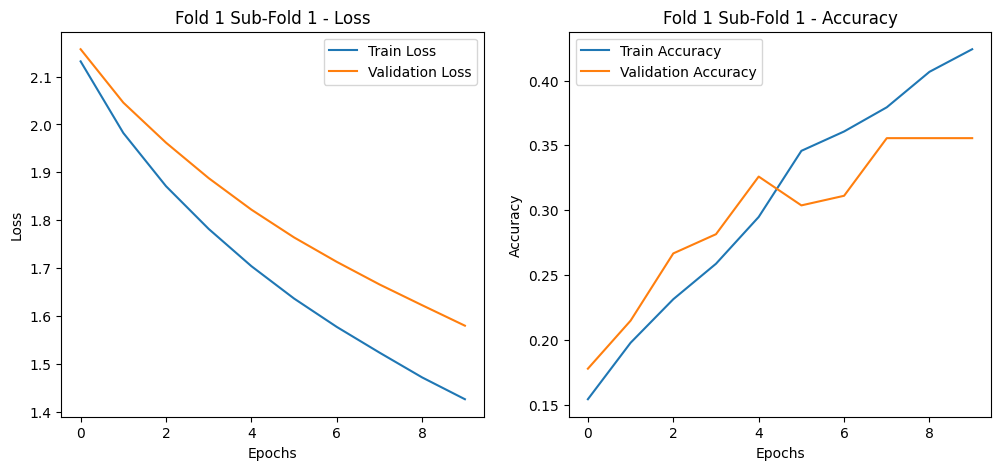

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


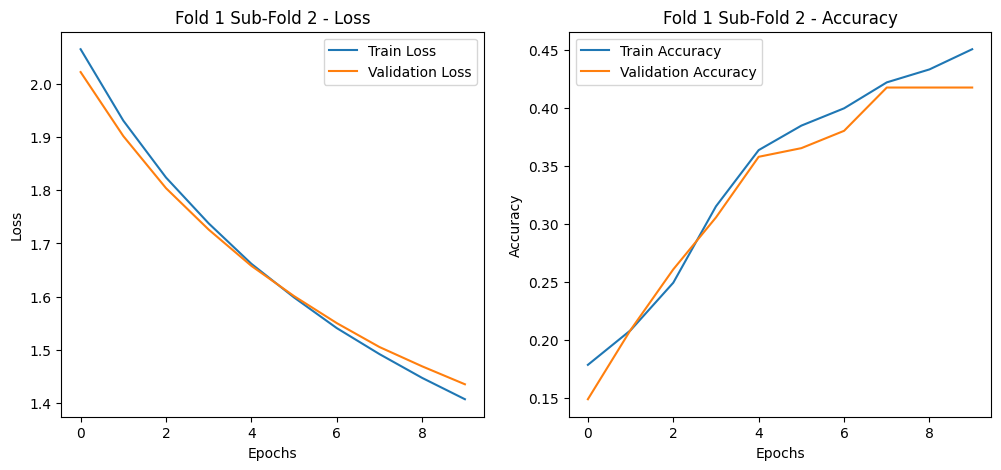

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


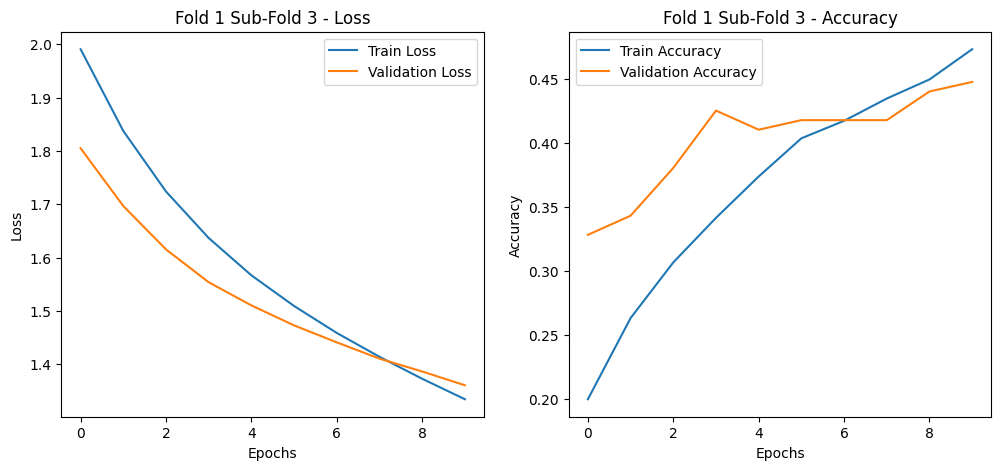

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


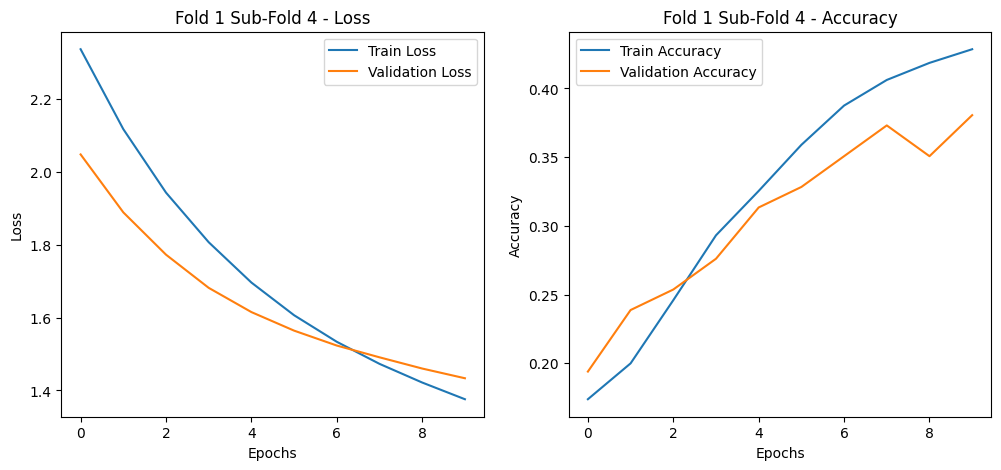

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


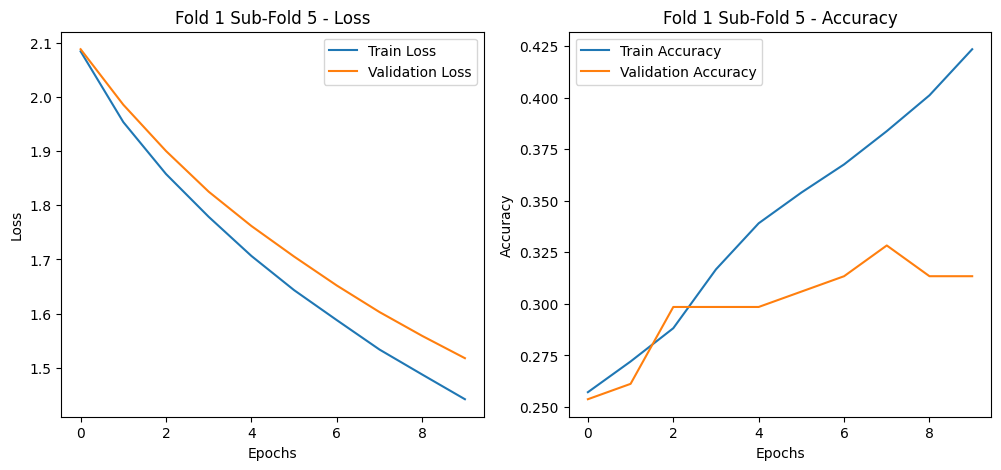

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


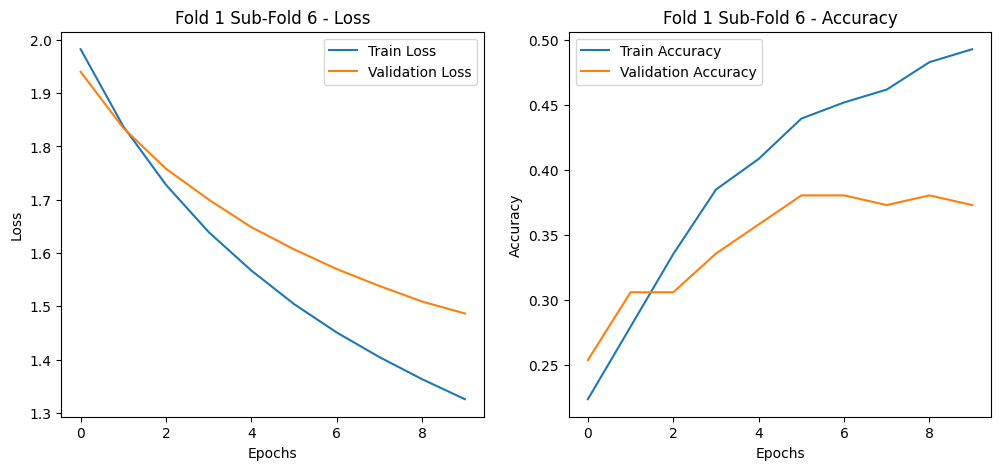

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


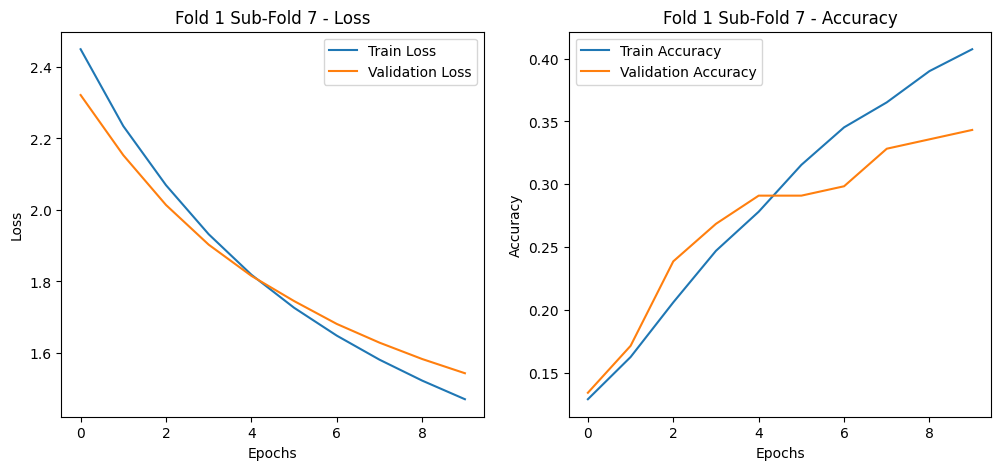

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


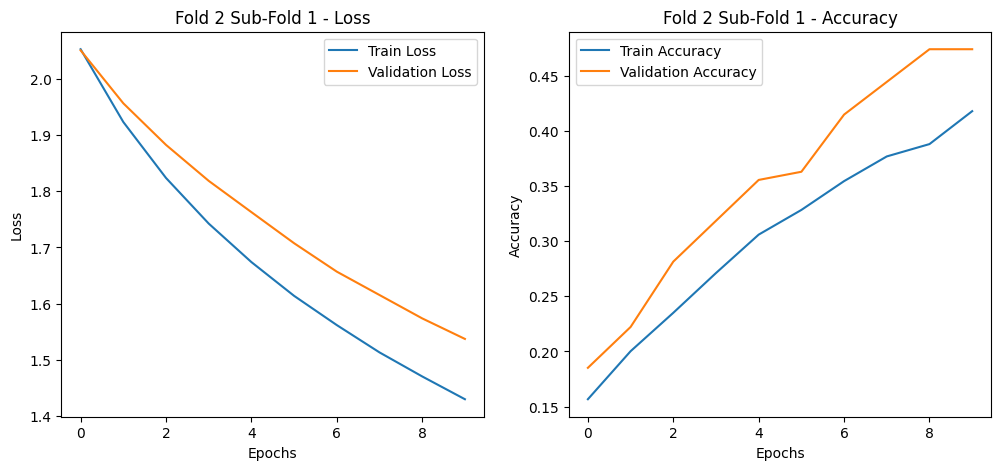

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


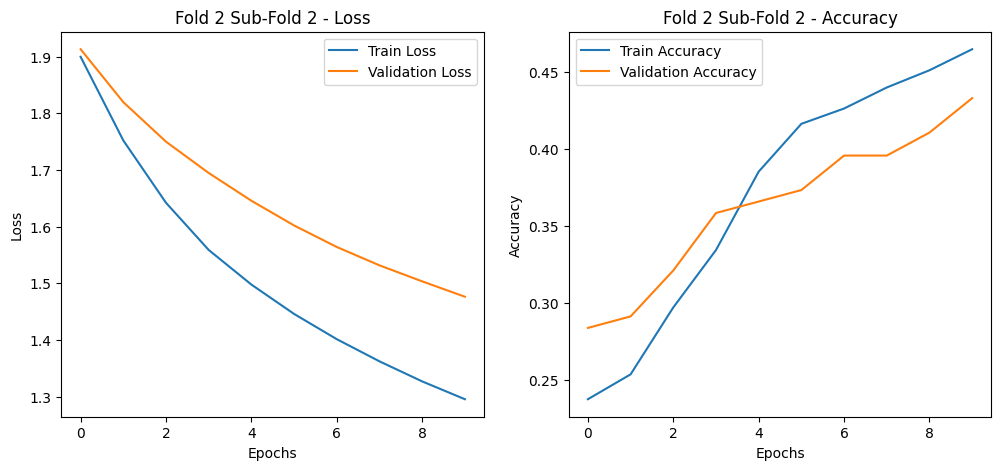

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


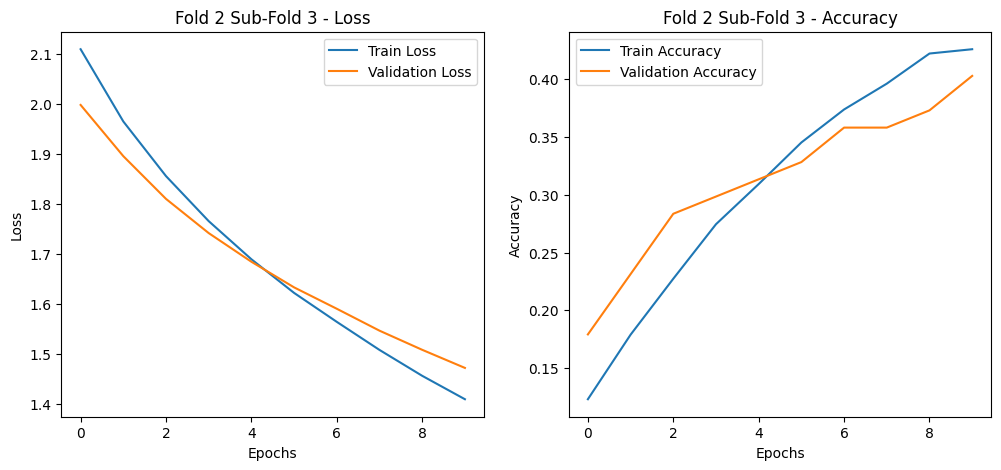

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


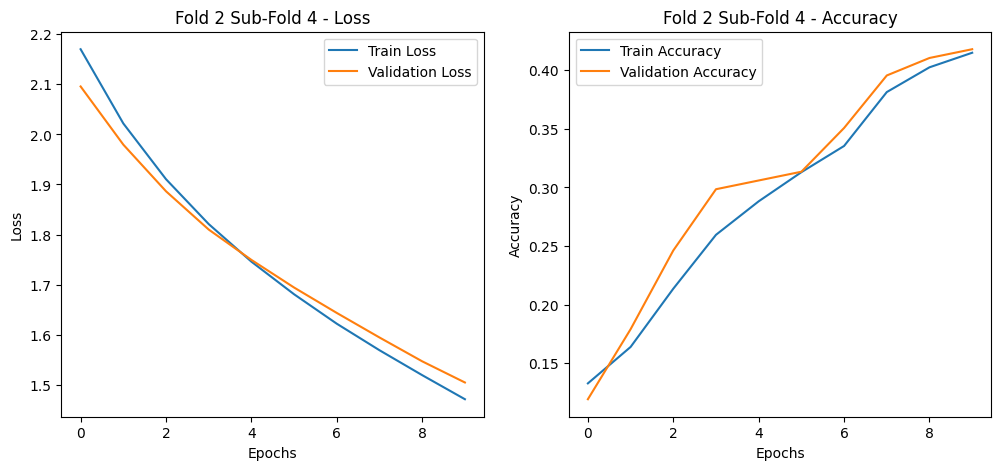

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


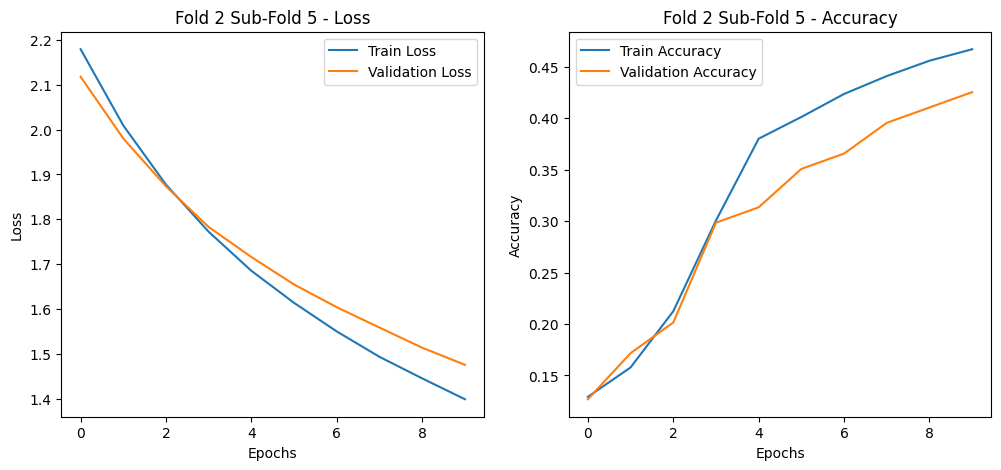

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


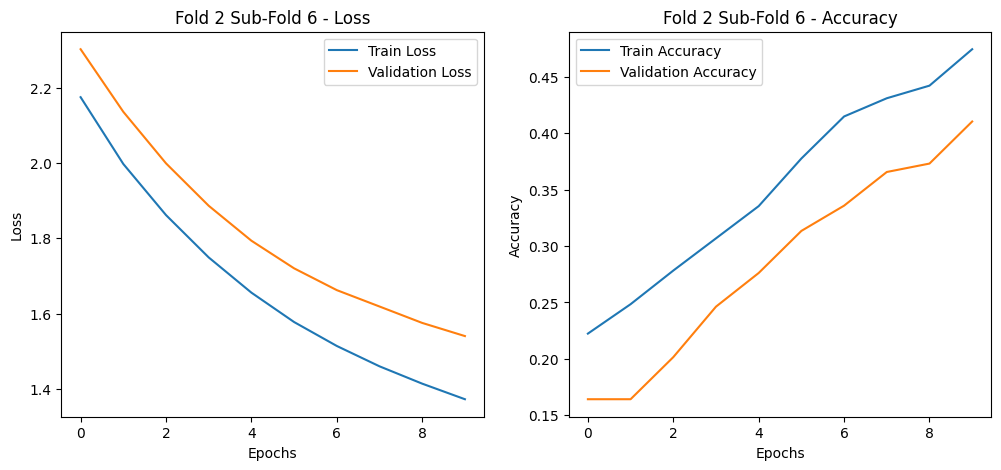

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


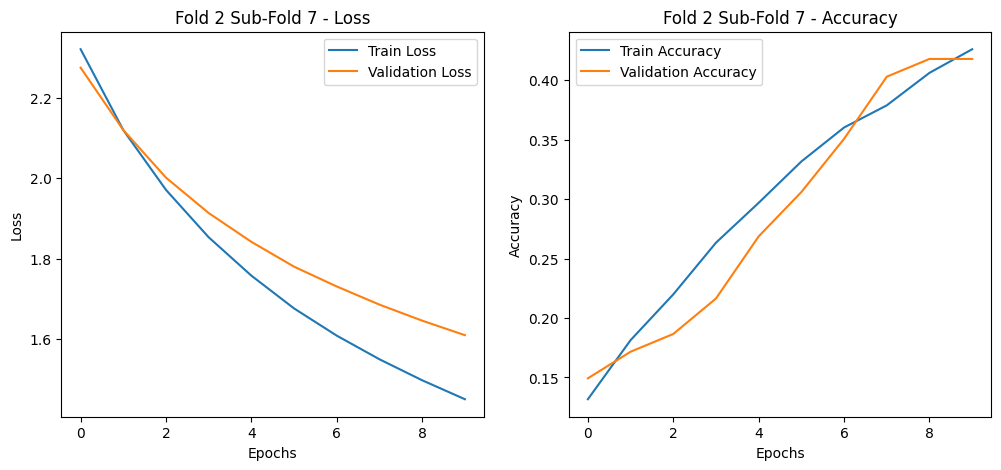

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


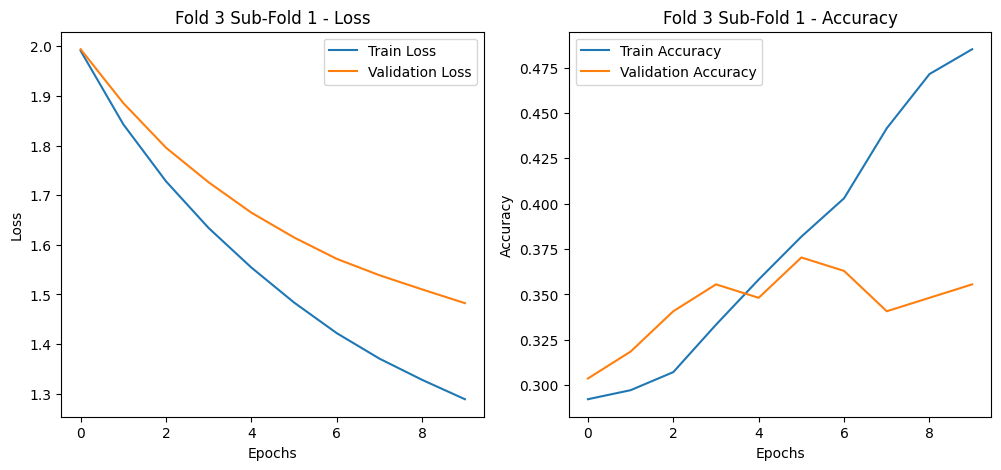

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


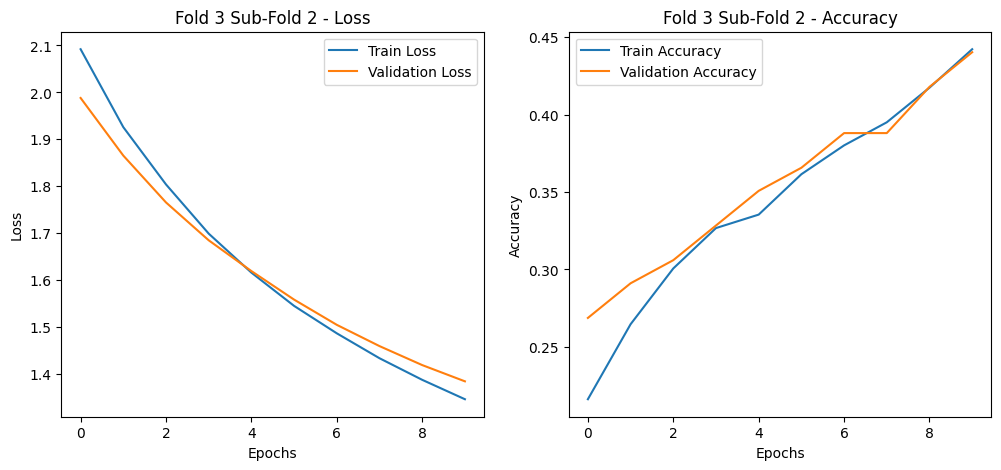

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


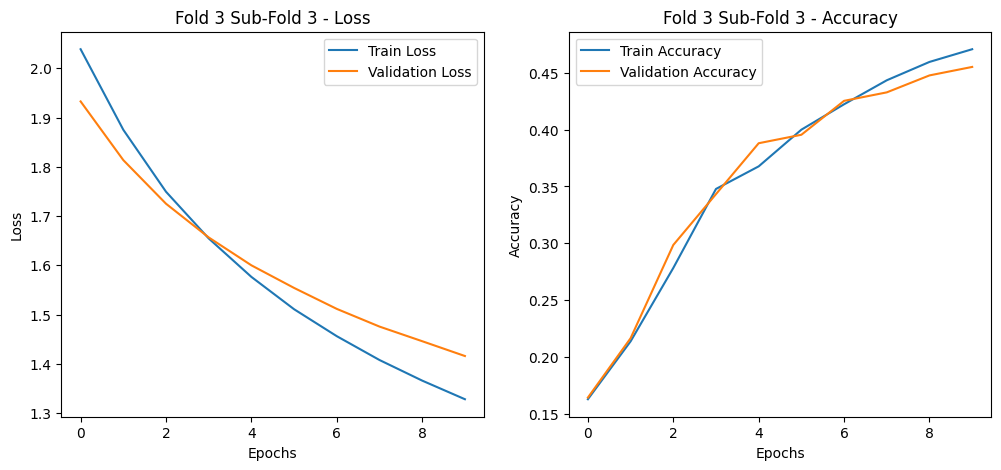

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


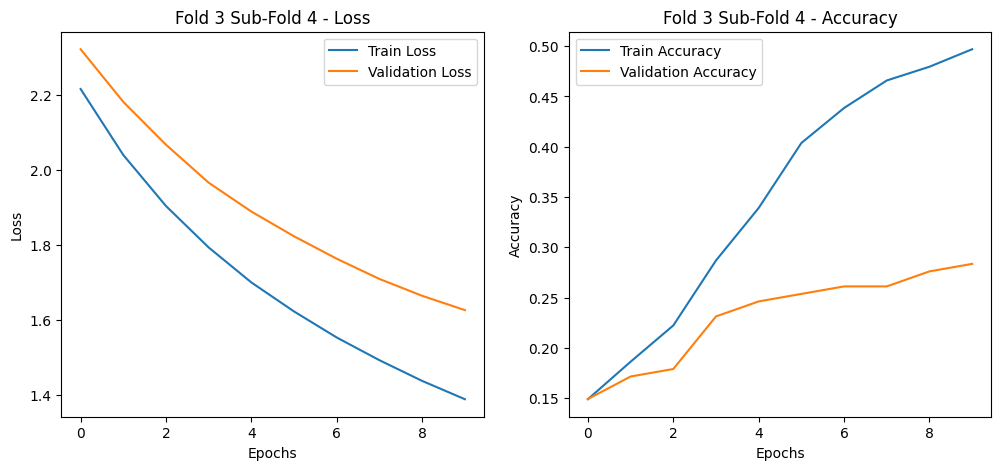

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


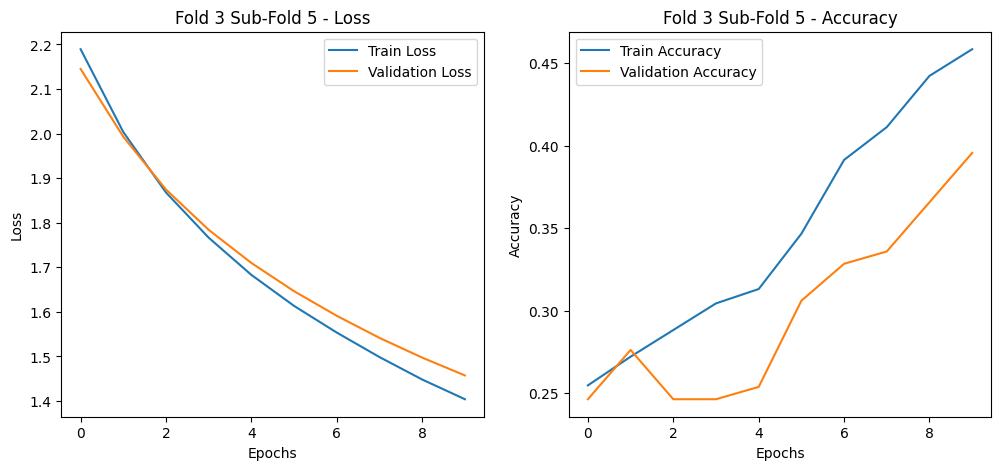

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


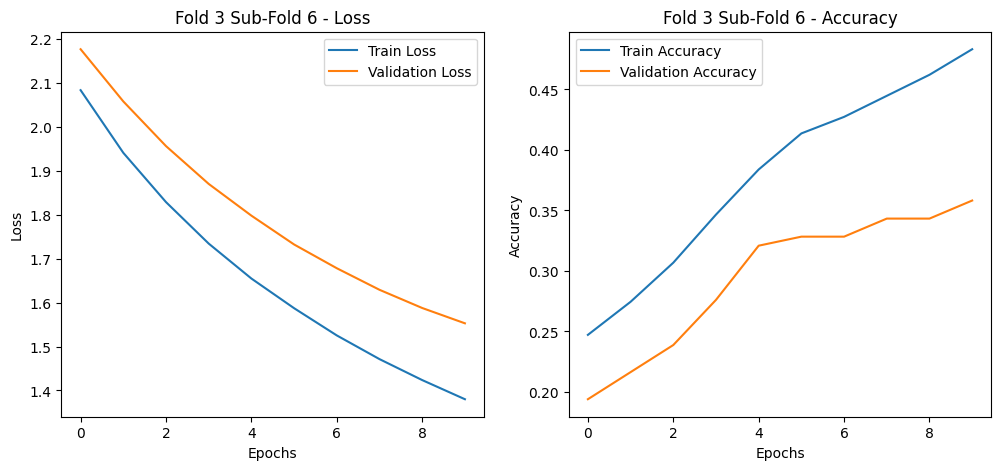

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


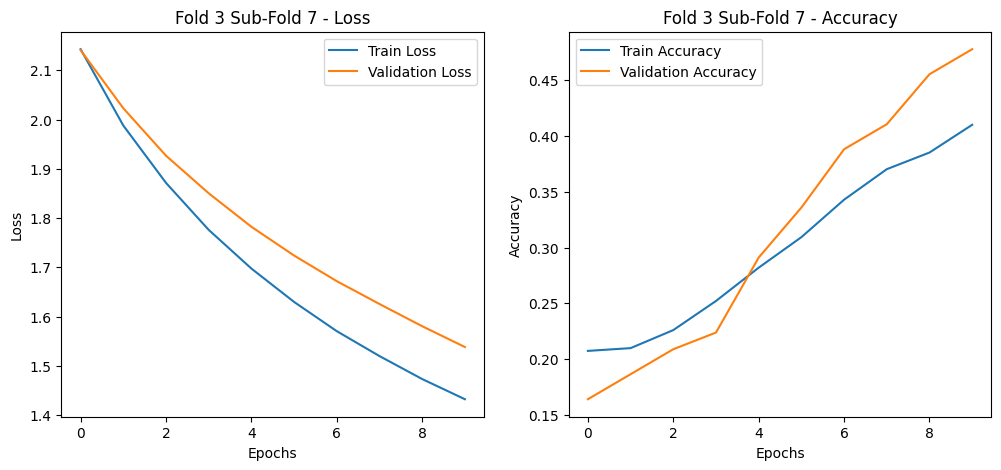

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


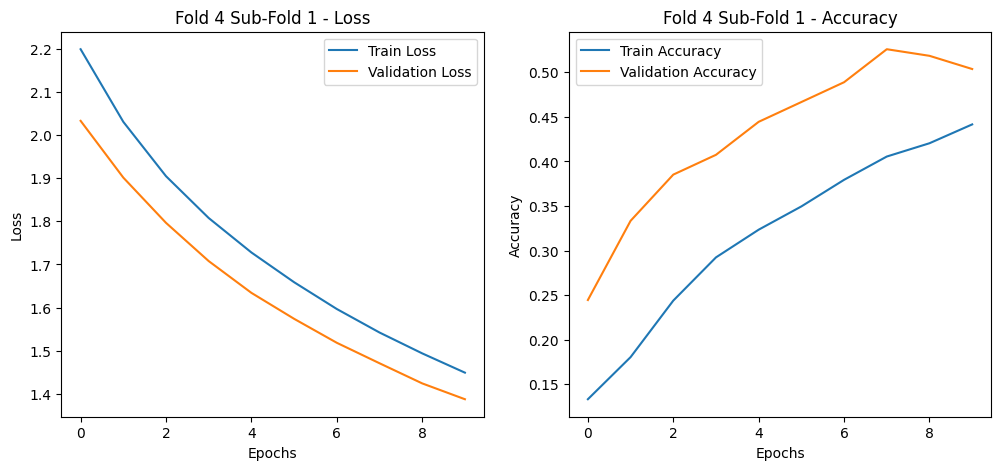

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


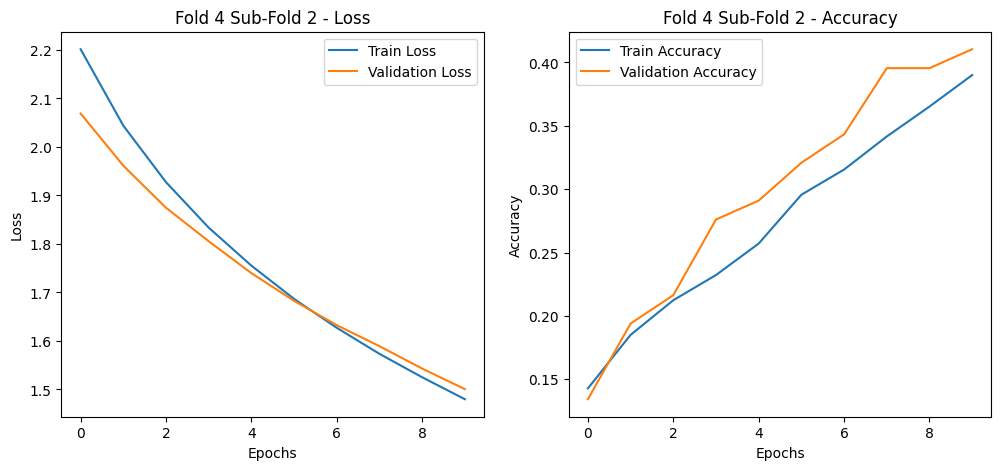

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


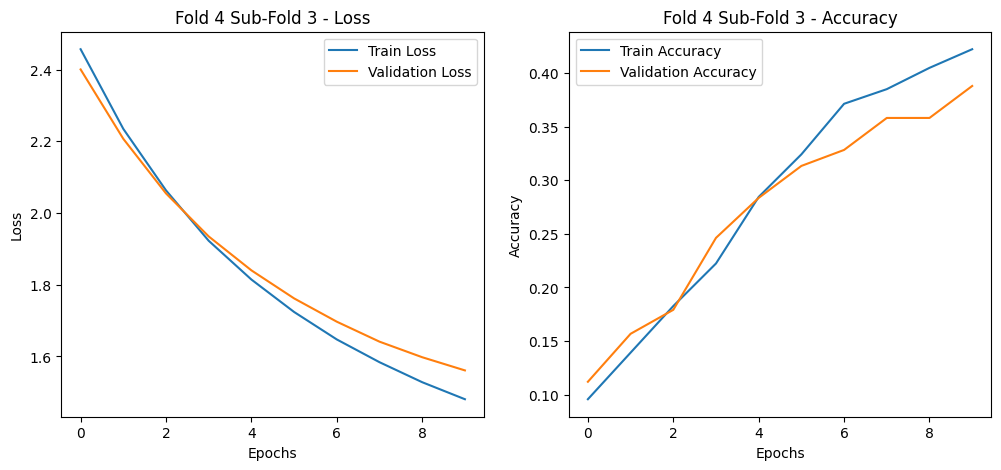

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


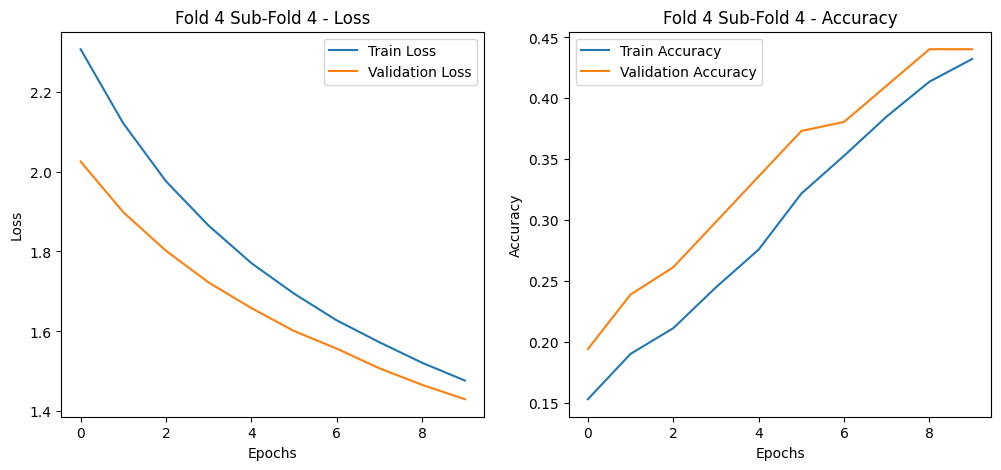

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


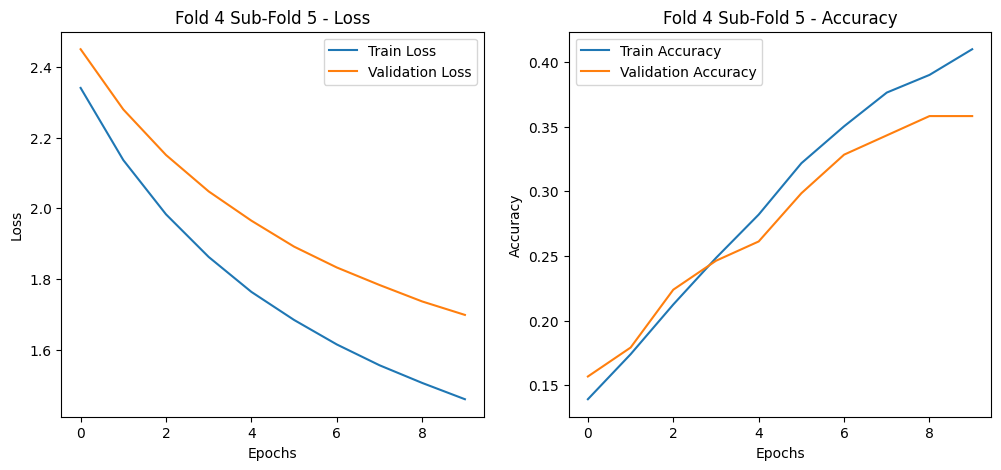

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


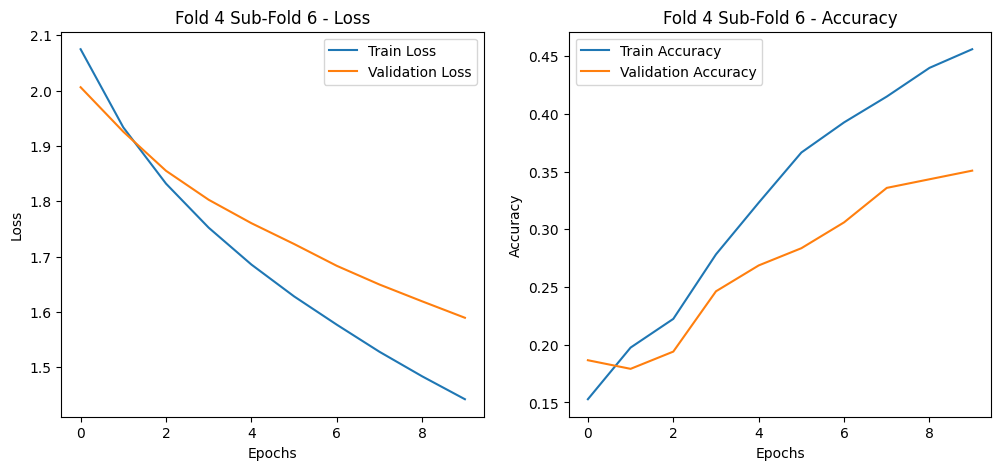

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


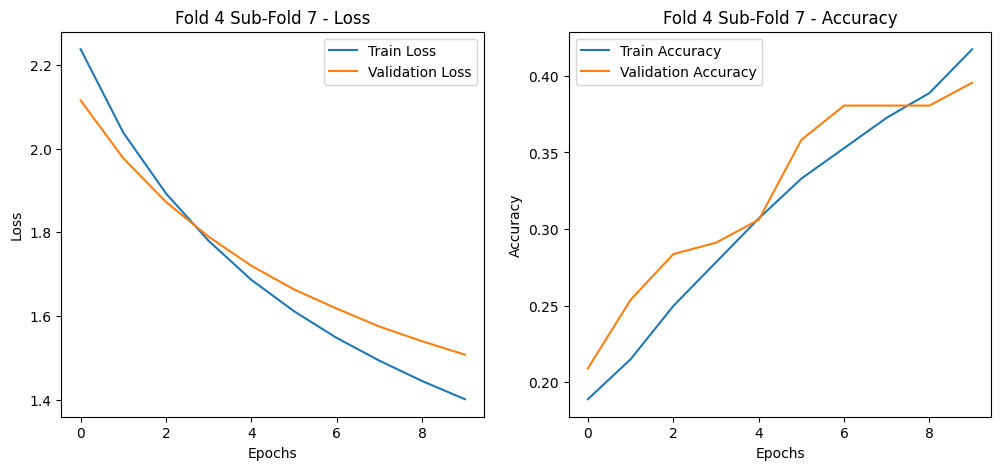

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


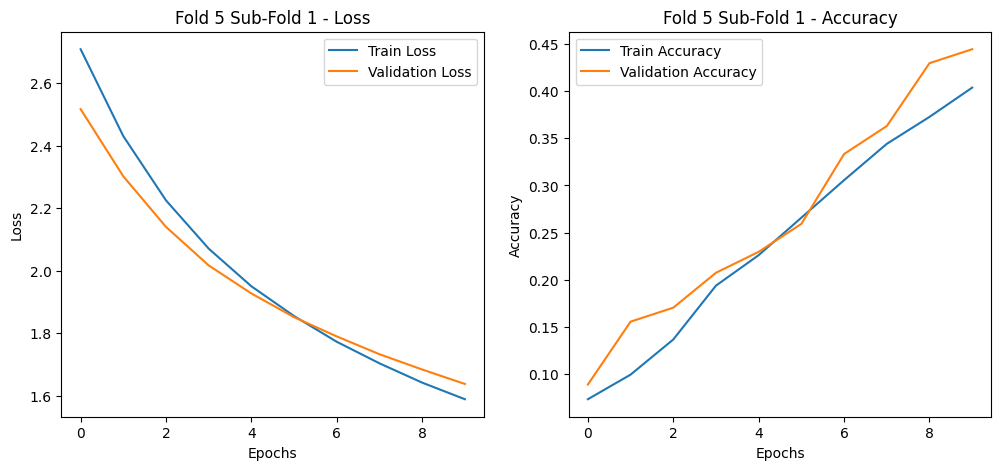

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


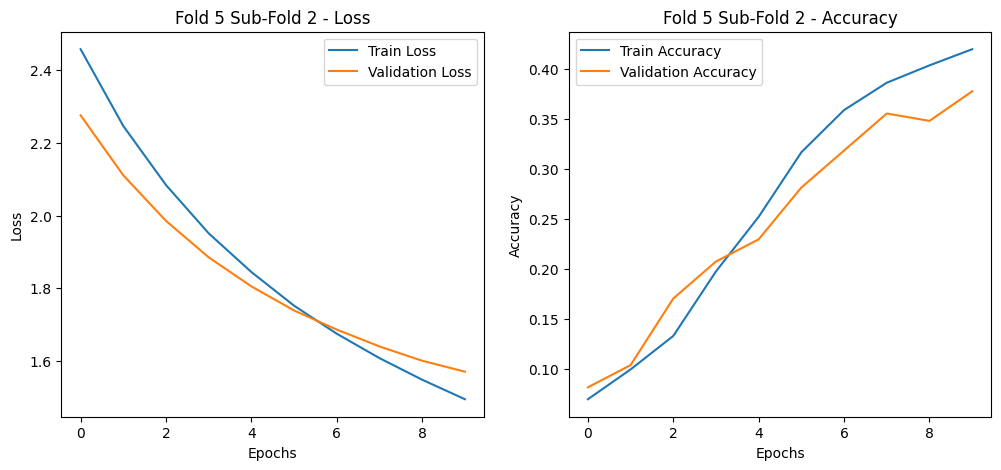

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


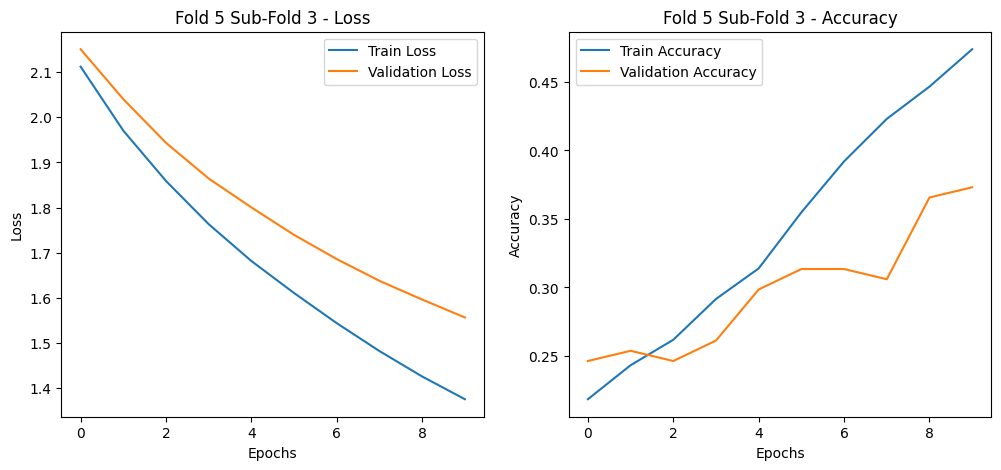

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


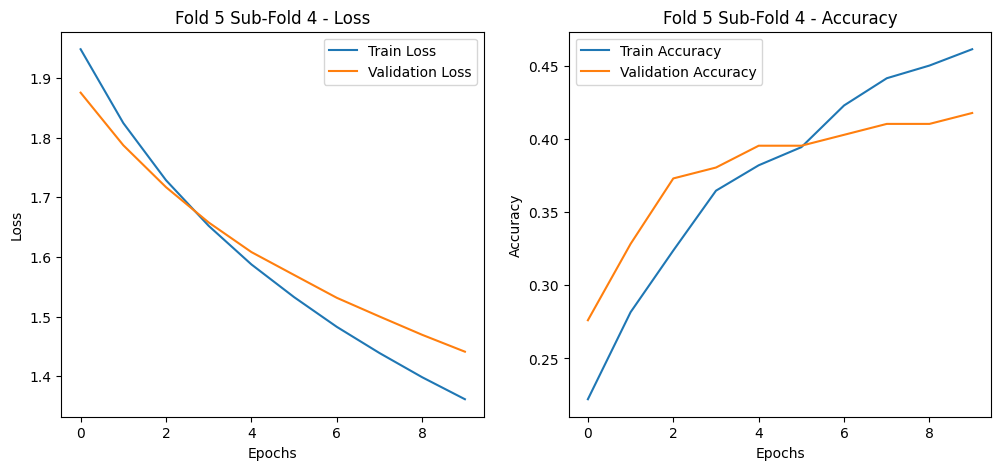

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


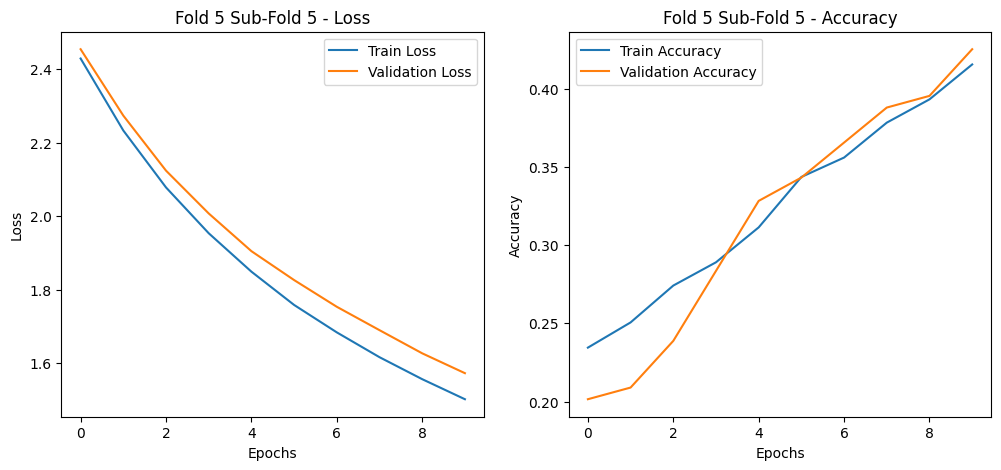

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


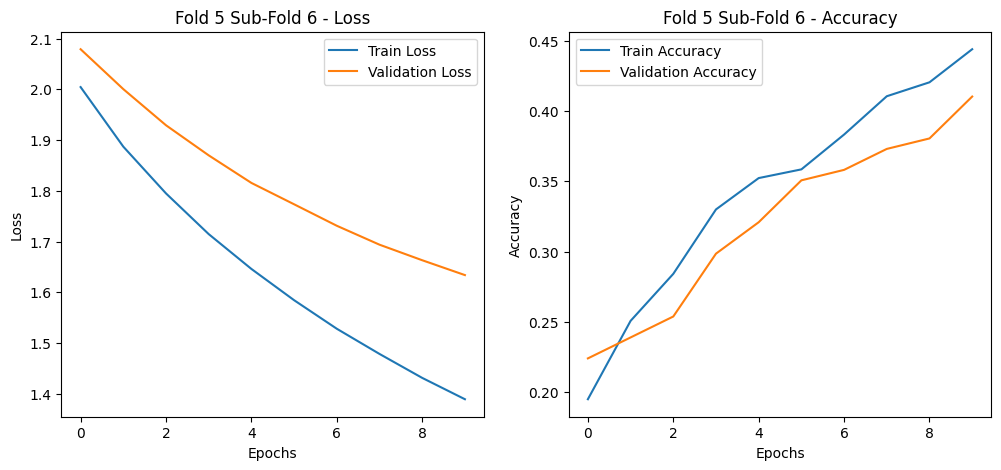

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


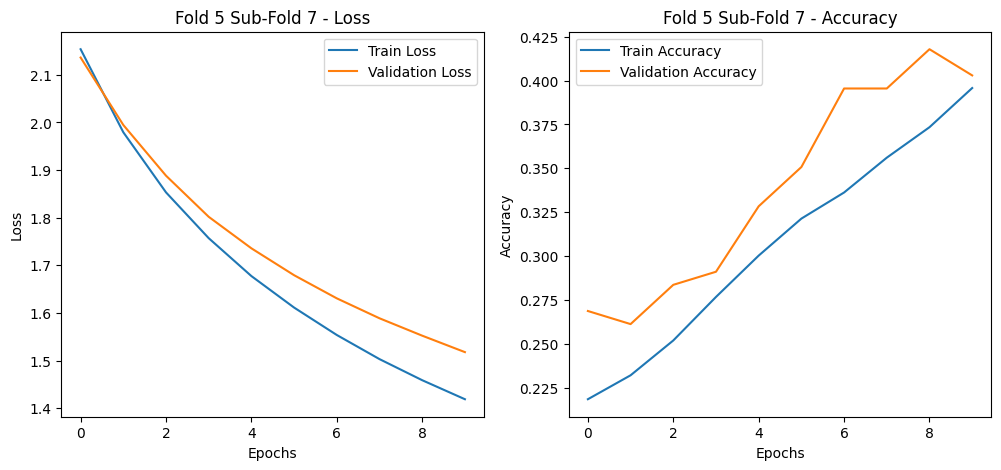

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


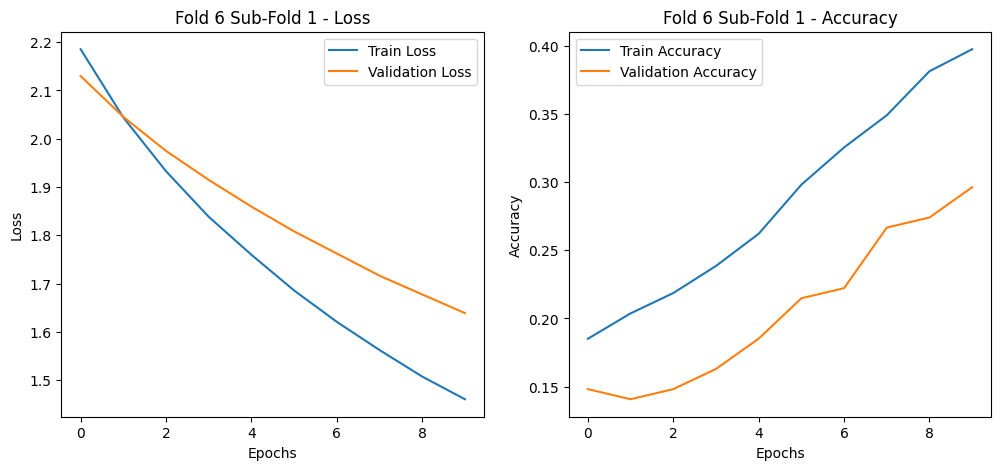

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


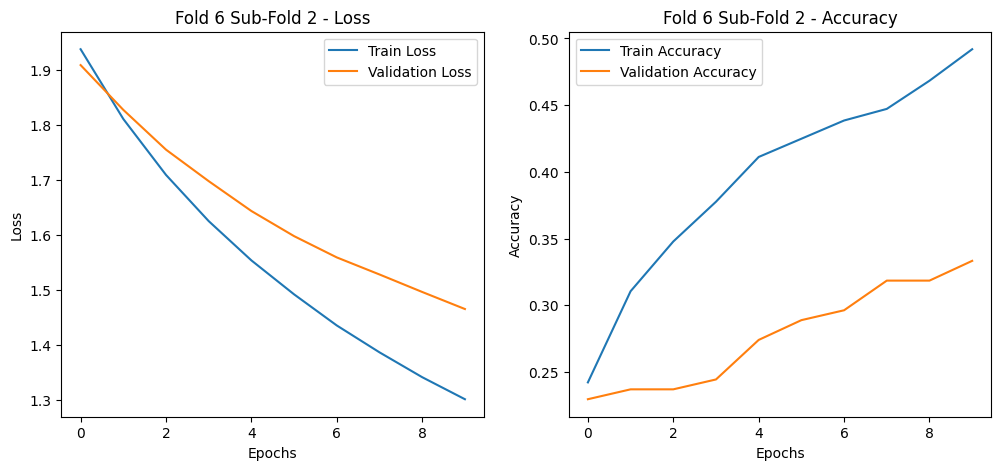

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


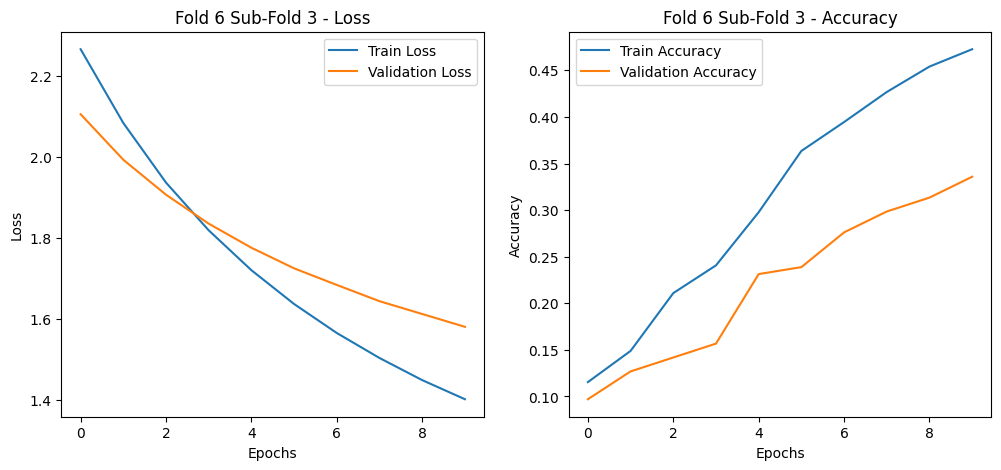

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


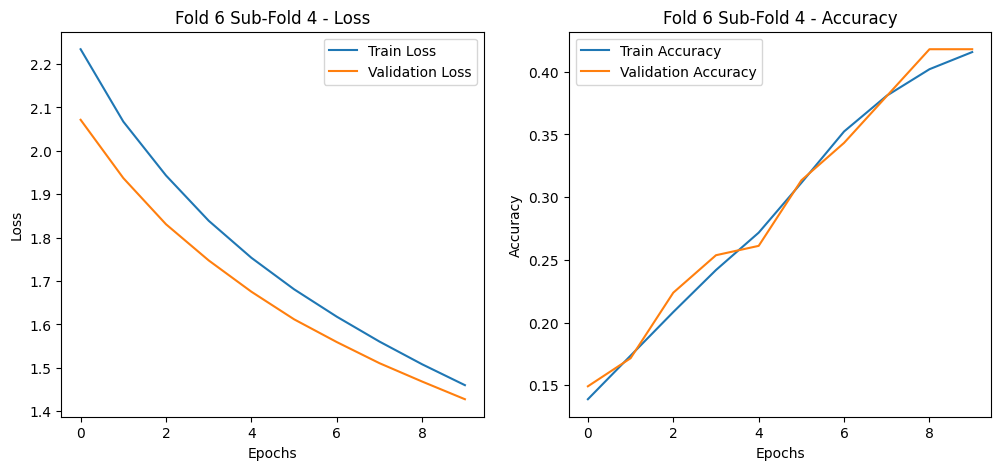

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


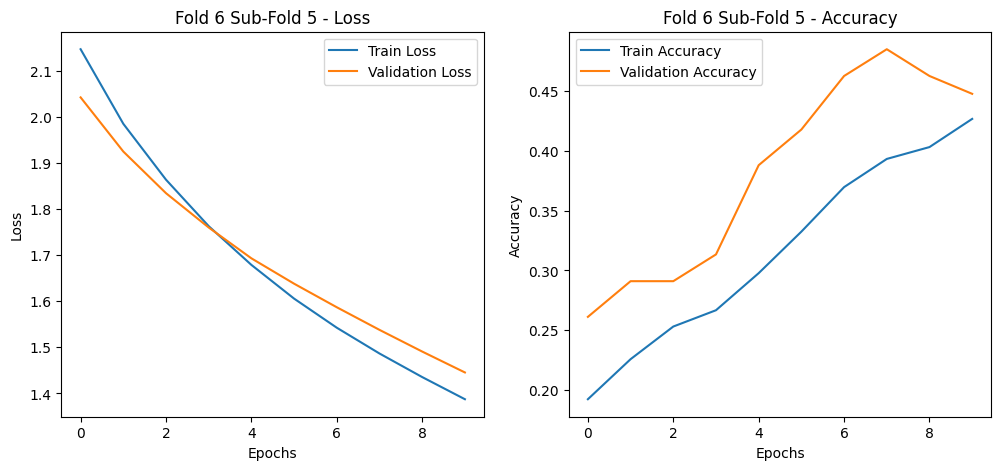

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


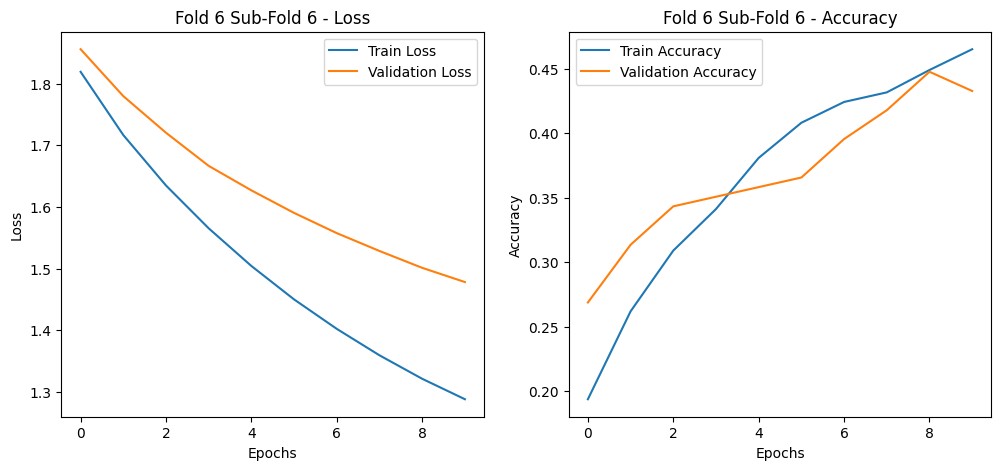

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


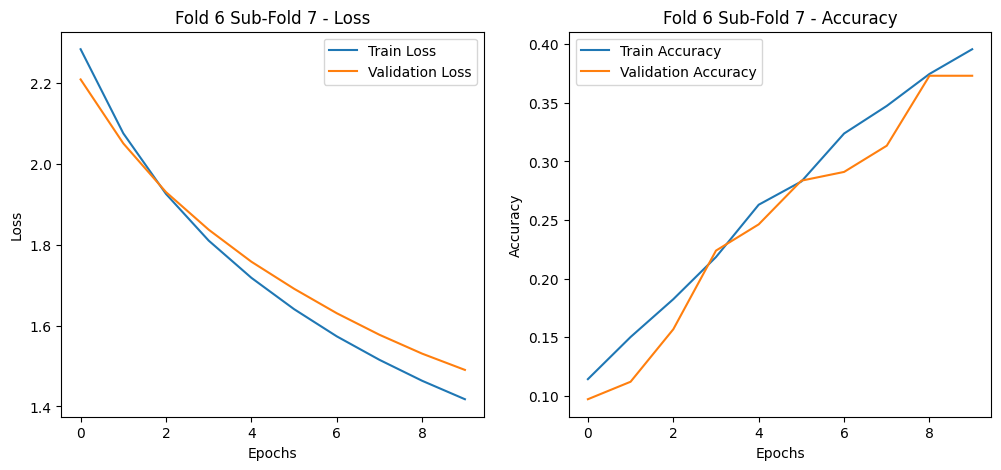

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


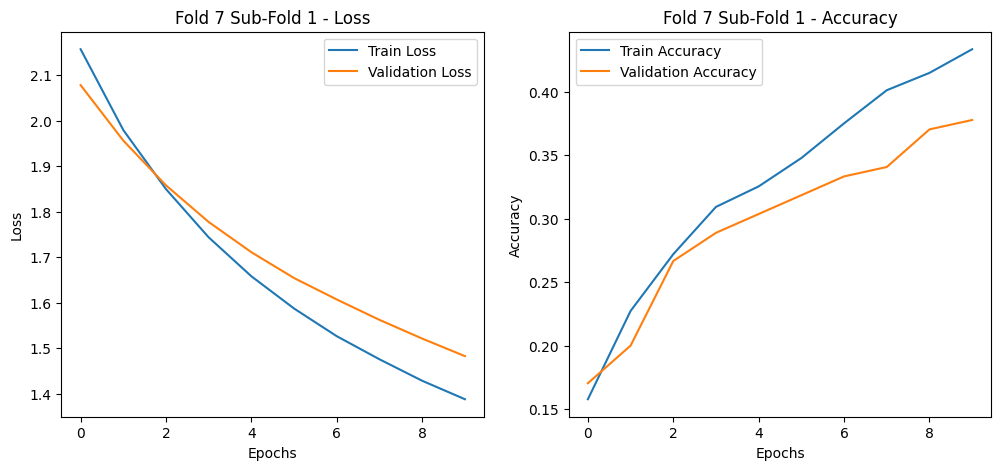

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


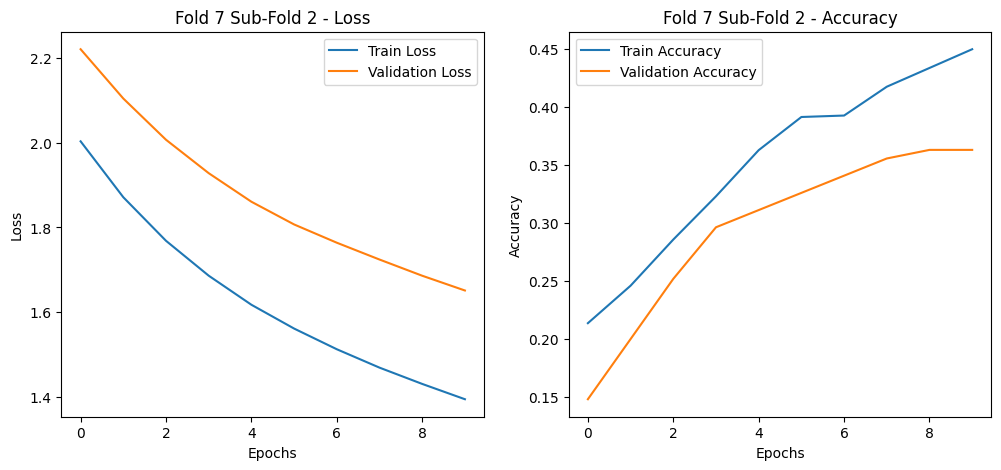

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


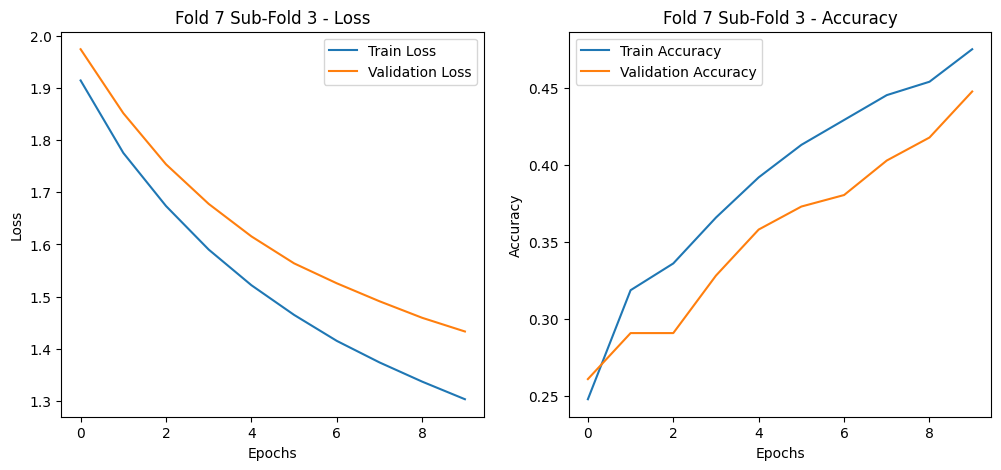

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


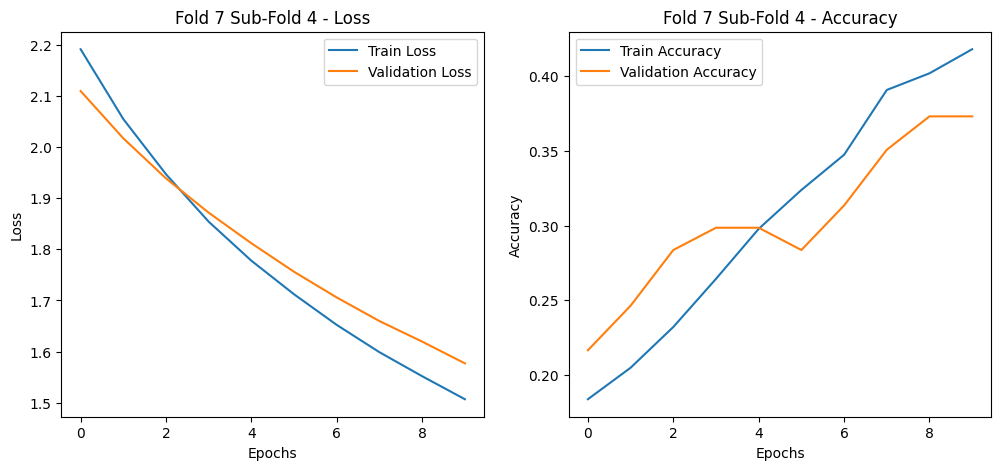

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


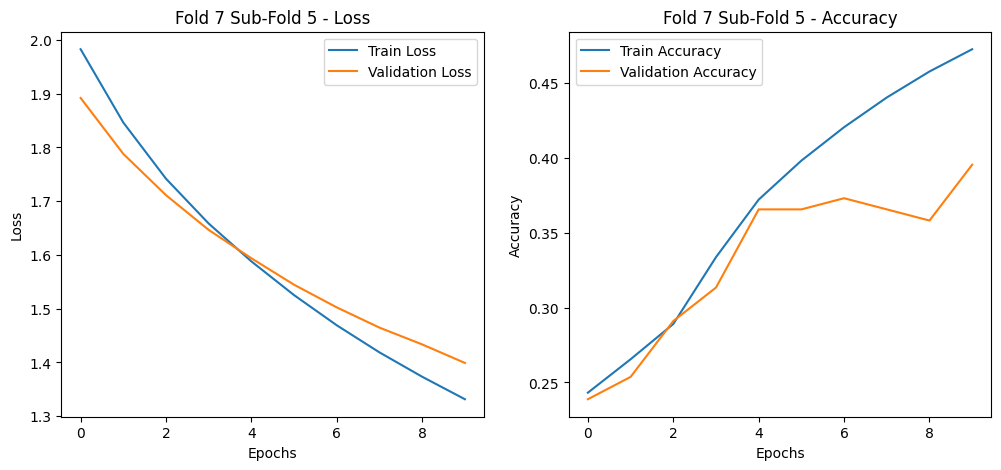

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


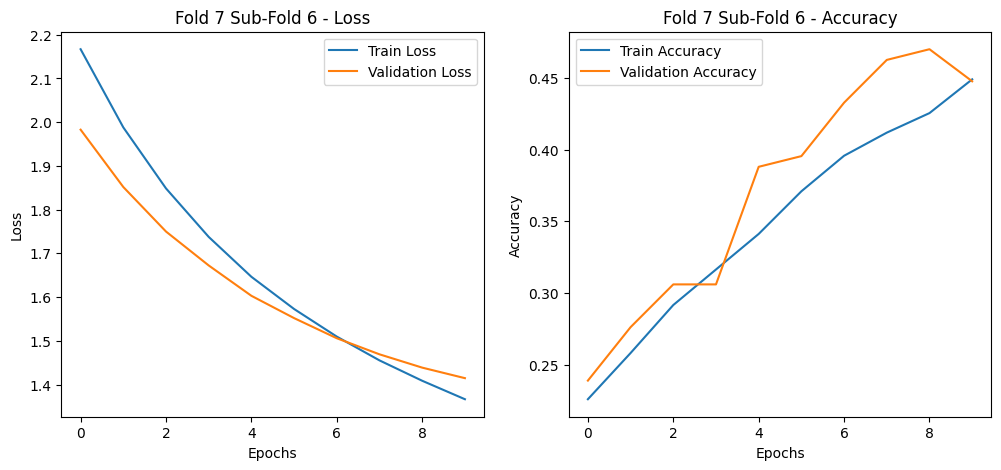

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


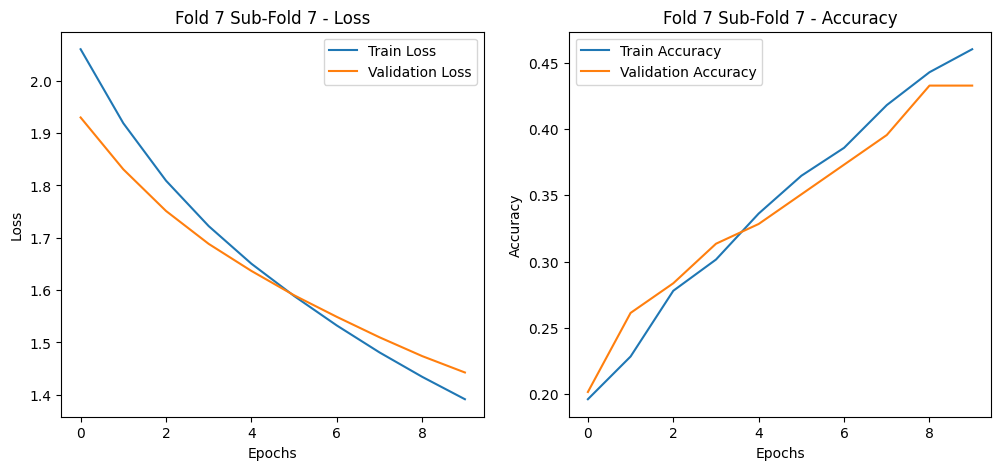

In [56]:
from sklearn.preprocessing import LabelEncoder

# Codificar os rótulos para garantir que estejam no intervalo esperado
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Aplicar k-Fold e Sub-K-Fold
for fold, (train_index, test_index) in enumerate(fold_indices):
    # Dados de treino e teste para o fold principal
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Aplicar Sub-K-Fold para treino e validação
    sub_fold_indices = list(sub_kf.split(X_train, y_train))
    
    for sub_fold, (sub_train_index, sub_val_index) in enumerate(sub_fold_indices):
        # Dados de treino e validação para o sub-k-fold
        X_sub_train, X_sub_val = X_train.iloc[sub_train_index], X_train.iloc[sub_val_index]
        y_sub_train, y_sub_val = y_train[sub_train_index], y_train[sub_val_index]
        
        # Criar o modelo
        num_classes = len(label_encoder.classes_)
        model = create_model(X.shape[1], num_classes)
        
        # Treinar o modelo e salvar o histórico
        history = model.fit(X_sub_train, y_sub_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_sub_val, y_sub_val))
        
        # Plotar o gráfico de perda (loss) e acurácia (accuracy)
        plt.figure(figsize=(12, 5))

        # Perda (loss)
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {fold + 1} Sub-Fold {sub_fold + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Acurácia (accuracy)
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Fold {fold + 1} Sub-Fold {sub_fold + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Mostrar o gráfico
        plt.show()
